<a href="https://colab.research.google.com/github/cdromcom/inst737/blob/main/inst737_finalProject_jayPatel_bsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INST 737: Fall 2025
# Jay Patel

## UID: 119137949
## E-mail: ppatel45@umd.edu



# Part 1: Altmetrics Explorer

In [118]:
!pip install gender-guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 11.8 MB/s eta 0:00:00


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
!pip install joypy

In [1]:
!pip install ethnicolr tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 135.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.

On the Altmetrics Explorer website, I clicked the tab "Mentions", and filtered for all sentiment across Bluesky. I focused justed on posts mentioning research articles (no books, datasets, clinical trial reports, etc.) during Jan 1, 2022 to Dec 8, 2025 to capture enough papers that could potentially be retracted by now (retractions can take days to decades).

In [3]:
# Load the dataset

import pandas as pd

altbsky = pd.read_excel('altmetrics-bsky-raw-all.xlsx')

Skimming the Excel file showed about 1 million rows. After reading in the data and inspecting the dimensions (shape), we find...

In [4]:
# Inspect the shape
altbsky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948973 entries, 0 to 948972
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Mention Type                948973 non-null  object 
 1   Mention Date                948973 non-null  object 
 2   Outlet or Author            902695 non-null  object 
 3   Mention Title               13 non-null      object 
 4   Country                     13 non-null      object 
 5   External Mention ID         13 non-null      object 
 6   Mention URL                 948973 non-null  object 
 7   Sentiment Analysis          948973 non-null  object 
 8   Research Output Title       948539 non-null  object 
 9   Journal/Collection Title    906405 non-null  object 
 10  Authors at my Institution   8 non-null       object 
 11  Departments                 8 non-null       object 
 12  Output Type                 948973 non-null  object 
 13  Subjects (FoR)

Using reading in with read_xlsx, I was able to preserve all of the 1 million and eighty rows in my Excel spreadsheet! Yay!

In [5]:
altbsky.head(3)

,Mention Type,Mention Date,Outlet or Author,Mention Title,Country,External Mention ID,Mention URL,Sentiment Analysis,Research Output Title,Journal/Collection Title,...,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,ADS Bibcode,arXiv ID,RePEc ID,SSRN,URN,Publisher Names
0,Bluesky post,2025-12-09 23:51:28,Not a Confederate,NaN,NaN,NaN,https://bsky.app/profile/did:plc:y2lctkh26henj...,Neutral,Safety Evaluation and Risk Assessment of the H...,Regulatory Toxicology & Pharmacology: RTP,...,http://linkinghub.elsevier.com/retrieve/pii/S0...,10854122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elsevier BV
1,Bluesky post,2025-12-09 23:49:49,phy_papers,NaN,NaN,NaN,https://bsky.app/profile/did:plc:3ow3lp7x5clt4...,Neutral,Reliable delineation of Clostridioides diffici...,bioRxiv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bluesky post,2025-12-09 23:43:53,Anton Dekker ? / AntonDekker@mastodon.nl,NaN,NaN,NaN,https://bsky.app/profile/did:plc:htlt2xknpwxkv...,Neutral negative,Climate anxiety in children and young people a...,The Lancet Planetary Health,...,NaN,34895496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elsevier BV


Cols look as expected when I previewed in Excel

In [ ]:
altbsky.tail(3)

,Mention Type,Mention Date,Outlet or Author,Mention Title,Country,External Mention ID,Mention URL,Sentiment Analysis,Research Output Title,Journal/Collection Title,...,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,ADS Bibcode,arXiv ID,RePEc ID,SSRN,URN,Publisher Names
1000077,Bluesky post,2025-09-15 11:25:38,Bloodsucking Parasites,NaN,NaN,NaN,https://bsky.app/profile/did:plc:w62kezupgrj3j...,Neutral positive,Small-RNA sequencing identifies serum microRNA...,Journal of Infection,...,NaN,40946863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elsevier BV
1000078,Bluesky post,2025-09-15 11:25:20,Hacker News Robot,NaN,NaN,NaN,https://bsky.app/profile/did:plc:eeoemrdkcnaoi...,Neutral,"""Hello, is this Anna?"": Unpacking the Lifecycl...",arXiv,...,NaN,NaN,NaN,NaN,NaN,2503.20821,NaN,NaN,NaN,NaN
1000079,Bluesky post,2025-09-15 11:25:07,Scott Lincicome,NaN,NaN,NaN,https://bsky.app/profile/did:plc:jfex7pbe5p7ne...,Neutral positive,Happier at Work? The Impact of Working at an E...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This was my fifth export and I finally got all the data I wanted. I originally tried X, but that did not have many columns. Now, I have Mention Date, Outlet or Author, Mention URL, Sentiment Analysis, Publication Date, and Publisher Names. Woo!

In [6]:
# Create a dataframe of the Missingness table above
missing = pd.DataFrame(altbsky.isna().sum())
missing

,0
Mention Type,0
Mention Date,0
Outlet or Author,46278
Mention Title,948960
Country,948960
External Mention ID,948960
Mention URL,0
Sentiment Analysis,0
Research Output Title,434
Journal/Collection Title,42568


The missing values in Mention Title, County, and External Mention ID are unfortunate. The Missing Values from columns 19-29 are not needed and can be dropped.

In [7]:
# Describe the 'Mention Date' column from altbsky
altbsky['Mention Date'].describe()

,Mention Date
count,948973
unique,789919
top,2025-01-22 05:00:00
freq,163


In [8]:
# Identify columns with more than 100,000 missing values (10% of dataset)
columns_to_drop = missing[missing[0] > 100000].index.tolist()

# Drop these columns from the altbsky DataFrame
altbsky = altbsky.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
print("Remaining columns:")
print(altbsky.columns.tolist())

Dropped 20 columns: ['Mention Title', 'Country', 'External Mention ID', 'Authors at my Institution', 'Departments', 'Subjects (FoR)', 'Affiliations (GRID)', 'DOI', 'ISBN', 'National Clinical Trial ID', 'URI', 'PubMed ID', 'PubMedCentral ID', 'Handle.net IDs', 'ADS Bibcode', 'arXiv ID', 'RePEc ID', 'SSRN', 'URN', 'Publisher Names']
Remaining columns:
['Mention Type', 'Mention Date', 'Outlet or Author', 'Mention URL', 'Sentiment Analysis', 'Research Output Title', 'Journal/Collection Title', 'Output Type', 'Publication Date', 'Altmetric Attention Score', 'Details Page URL']


In [9]:
altbsky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948973 entries, 0 to 948972
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Mention Type               948973 non-null  object
 1   Mention Date               948973 non-null  object
 2   Outlet or Author           902695 non-null  object
 3   Mention URL                948973 non-null  object
 4   Sentiment Analysis         948973 non-null  object
 5   Research Output Title      948539 non-null  object
 6   Journal/Collection Title   906405 non-null  object
 7   Output Type                948973 non-null  object
 8   Publication Date           946582 non-null  object
 9   Altmetric Attention Score  948953 non-null  object
 10  Details Page URL           948953 non-null  object
dtypes: object(11)
memory usage: 79.6+ MB


In this trimmed dataset, I have just the key columns.

In [12]:
# Summarize the column 'Altmetric Attention Score'
altbsky['Altmetric Attention Score'].describe()

,Altmetric Attention Score
count,948953
unique,3088
top,1
freq,264367


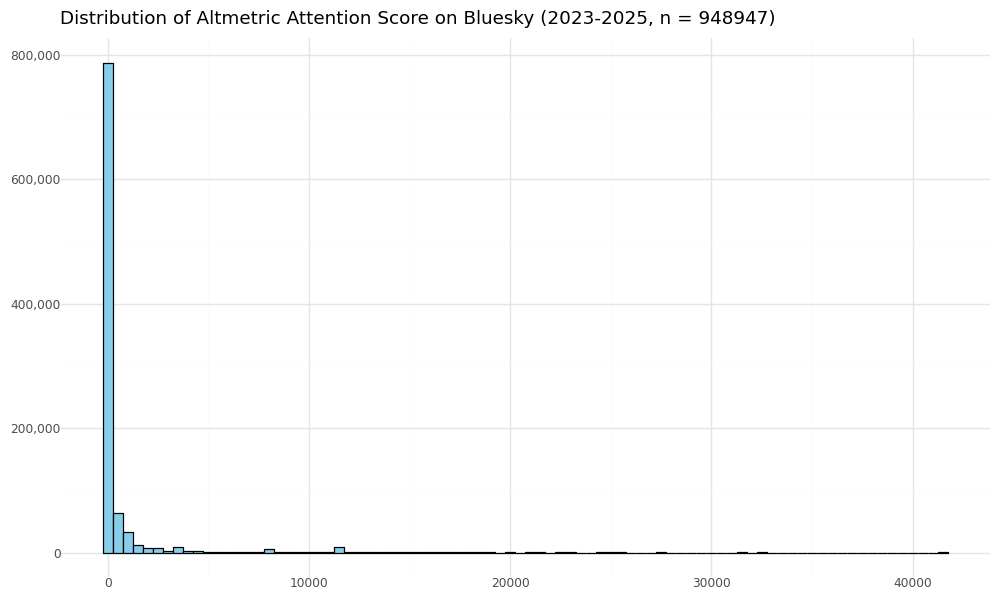

In [23]:
from plotnine import *

# Ensure 'Altmetric Attention Score' is numeric
altbsky['Altmetric Attention Score'] = pd.to_numeric(altbsky['Altmetric Attention Score'], errors='coerce')

# Drop rows where 'Altmetric Attention Score' is NaN after conversion
altbsky_cleaned = altbsky.dropna(subset=['Altmetric Attention Score'])

# Get the total number of observations for the title
n_observations = altbsky_cleaned.shape[0]

# Generate the histogram
(ggplot(altbsky_cleaned, aes(x='Altmetric Attention Score'))
 + geom_histogram(binwidth=500, fill='skyblue', color='black') # You can adjust binwidth as needed
 + labs(
    title=f'Distribution of Altmetric Attention Score on Bluesky (2023-2025, n = {n_observations})',
    x='', # Remove x-axis label
    y=''  # Remove y-axis label
 )
 + scale_y_continuous(labels=lambda l: [f'{x:,.0f}' for x in l]) # Format y-axis with commas using a lambda function
 + theme_minimal()
 + theme(
    figure_size=(10, 6), # Adjust figure size for better visualization
    plot_title=element_text(hjust=0) # Left-align the title
 )
).draw()

In [24]:
import numpy as np
# Log-transform the column 'Altmetric Attention Score'
altbsky['Altmetric Attention Score'].apply(np.log)

,Altmetric Attention Score
0,7.203406
1,0.000000
2,8.719807
3,7.203406
4,2.197225
...,...
948968,3.367296
948969,2.564949
948970,4.290459
948971,2.484907


The data are now condensed closer together.

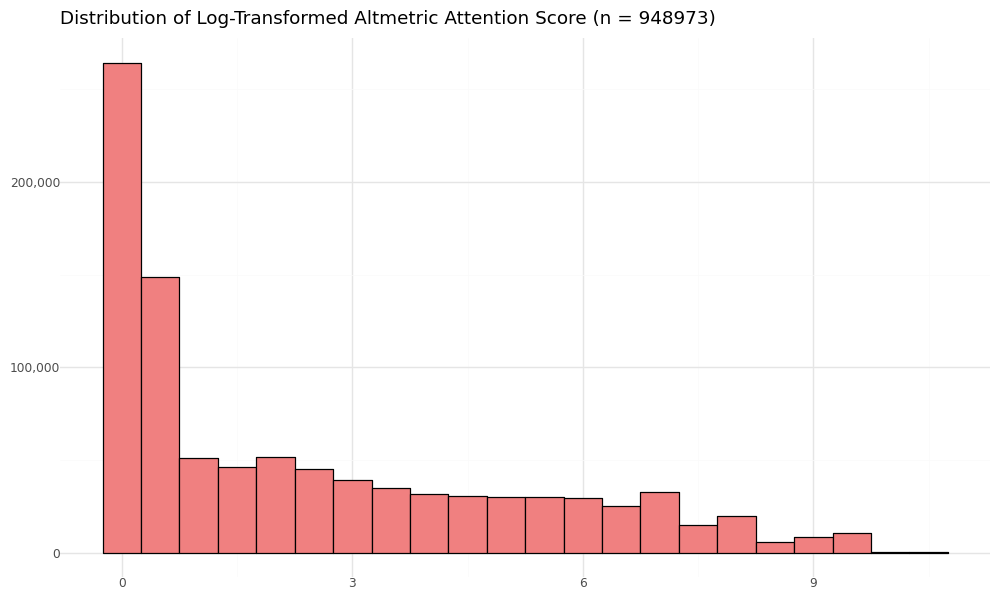

In [29]:
# Log-transform the 'Altmetric Attention Score' and handle potential infinite values
altbsky['Log Altmetric Attention Score'] = altbsky['Altmetric Attention Score'].apply(lambda x: np.log(x) if x > 0 else 0) # Handle non-positive values gracefully

# Drop rows where 'Log Altmetric Attention Score' might be NaN or inf after transformation
altbsky_log_cleaned = altbsky.dropna(subset=['Log Altmetric Attention Score'])

# Get the total number of observations for the title
n_observations_log = altbsky_log_cleaned.shape[0]

# Plot a histogram of the log-transformed Altmetric Attention Score using ggplot2
(ggplot(altbsky_log_cleaned, aes(x='Log Altmetric Attention Score'))
 + geom_histogram(binwidth=0.5, fill='lightcoral', color='black') # Adjust binwidth as appropriate for log scale
 + labs(
    title=f'Distribution of Log-Transformed Altmetric Attention Score (n = {n_observations_log})',
    x='', # Remove x-axis label
    y=''  # Remove y-axis label
 )
 + scale_y_continuous(labels=lambda l: [f'{x:,.0f}' for x in l]) # Format y-axis with commas using a lambda function
 + theme_minimal()
 + theme(
    figure_size=(10, 6),
    plot_title=element_text(hjust=0) # Left-align the title
 )
).draw()

In [30]:
# Compute the counts of each Sentiment level
altbsky['Sentiment Analysis'].value_counts()

,count
Sentiment Analysis,
Neutral,839624
Neutral negative,54421
Negative,41029
Strong negative,13886
Meghalaya; University of Science and Technology of China; University of Science and Technology of Fujairah; University of Sfax; University of Sharjah; University of Sheffield; University of Social Welfare and Rehabilitation Sciences; University of South Africa; University of Southampton; University of South Australia; University of South Carolina; University of Southern California; University of Southern Denmark; University of South Wales; University of St Andrews; University of Sulaymaniyah; University of Swabi; University of Swat; University of Szeged; University of Tabuk; University of Tartu; University of Tasmania; University of Technology Sydney; University of Tehran; University of Tennessee at Knoxville; University of Tennessee Health Science Center; University of the Coast; University of the Fraser Valley; University of the Gambia; University of the Philippines Manila; University of the Republic; University of Thessaly; University of the Western Cape; University of the West Indies,6
https://www.altmetric.com/details/182401059,5
Hanoi; VinUniversity; Virginia Commonwealth University; Volgograd State Medical University; Wachemo University; Wake Forest University; Washington University in St. Louis; Wayne State University; Weiss Memorial Hospital; Wenzhou Medical University; West China Hospital of Sichuan University; Western New England University; Western Sydney University; Western University,2


In [31]:
# If the number of words is greater than two in the column Sentiment Analysis, drop those rows
altbsky = altbsky[altbsky['Sentiment Analysis'].apply(lambda x: len(str(x).split()) <= 2 if pd.notna(x) else True)]

# Define the values to be dropped, including the specific date string
# Ensure the 'Sentiment Analysis' column values are explicitly strings to avoid type issues during filtering
altbsky['Sentiment Analysis'] = altbsky['Sentiment Analysis'].astype(str)
values_to_drop = ['https://www.altmetric.com/details/182401059', '2025-09-24 00:00:00']

# Drop rows where 'Sentiment Analysis' contains these specific values
altbsky = altbsky[~altbsky['Sentiment Analysis'].isin(values_to_drop)]

# Display the value counts again to confirm the change
altbsky['Sentiment Analysis'].value_counts()

/tmp/ipython-input-1601088581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count
Sentiment Analysis,
Neutral,839624
Neutral negative,54421
Negative,41029
Strong negative,13886


In [32]:
# Sum the counts
altbsky['Sentiment Analysis'].value_counts()

,count
Sentiment Analysis,
Neutral,839624
Neutral negative,54421
Negative,41029
Strong negative,13886


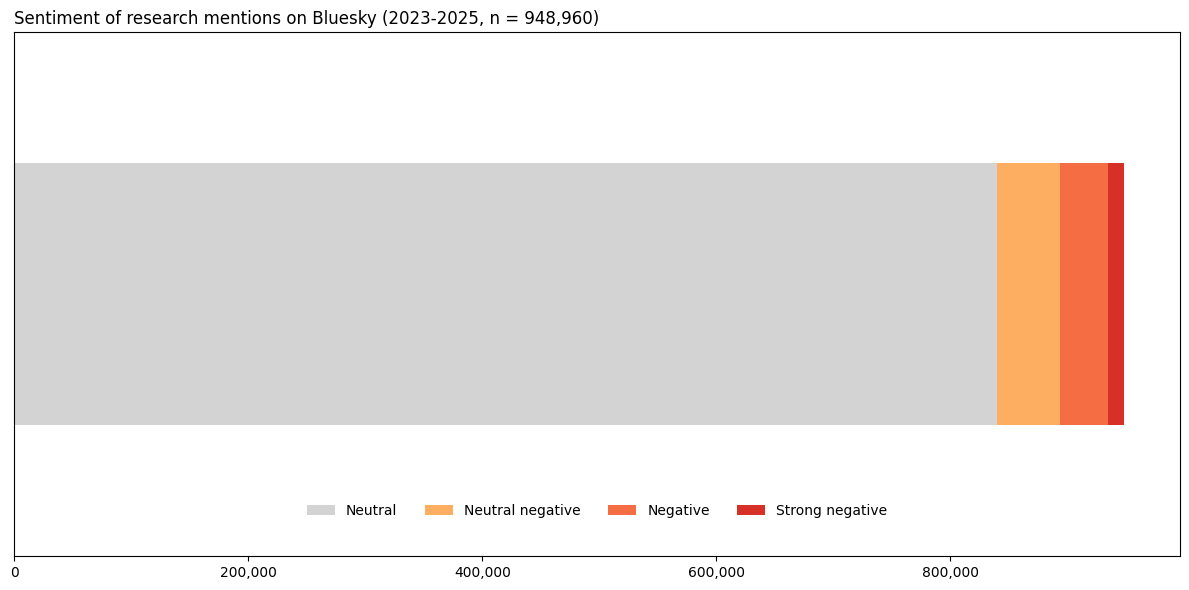

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker # Import ticker for formatting

# Define the sentiment order based on the user's request (corrected order for color mapping)
sentiment_order = ['Strong positive', 'Neutral positive', 'Positive', 'Neutral', 'Neutral negative', 'Negative', 'Strong negative']

# Define a diverging color palette for the ordered sentiments
diverging_colors_full = ['#1A9850', '#66BD63', '#A6D96A', '#D3D3D3', '#FDAE61', '#F46D43', '#D73027'] # Dark Green to Dark Red with Gray in middle

# Create a dictionary to map sentiment names to their corresponding colors
sentiment_to_color_map = {s: c for s, c in zip(sentiment_order, diverging_colors_full)}

# Calculate the frequency of each sentiment
sentiment_counts = altbsky['Sentiment Analysis'].value_counts()

# Calculate n_observations for the title (sum of all sentiment counts)
n_observations = sentiment_counts.sum()

# Reindex to ensure consistent order, and transpose for a single stacked bar
# Filter for only the sentiments present in the sentiment_order
stacked_sentiment_data = pd.DataFrame(sentiment_counts.reindex(sentiment_order).dropna()).T

# Get the list of sentiments actually present in the stacked_sentiment_data columns
present_sentiments = stacked_sentiment_data.columns.tolist()

# Create the list of colors for plotting based on the present sentiments
colors_for_plot = [sentiment_to_color_map[s] for s in present_sentiments]

# Plot as a single stacked horizontal bar chart
plt.figure(figsize=(12, 6)) # Adjust figure size for better visualization
ax = stacked_sentiment_data.plot(kind='barh', stacked=True, color=colors_for_plot, ax=plt.gca()) # Use dynamically selected colors

# Add title and labels
plt.title(f'Sentiment of research mentions on Bluesky (2023-2025, n = {n_observations:,})', loc='left') # Left-align the title
plt.xlabel('') # Remove x-axis label
plt.ylabel('') # No y-label needed for a single bar

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Use commas in the x-axis numbers
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add legend to the bottom, horizontal orientation, within the plot area
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=len(present_sentiments), frameon=False)

plt.tight_layout()
plt.show()

In [44]:
# In column 'Altmetric Attention Score', drop the NAs
altbsky = altbsky.dropna(subset=['Altmetric Attention Score'])

In [45]:
# Check NAs in columns: 'Altmetric Attention Score' and 'Sentiment Analysis'
altbsky[['Altmetric Attention Score', 'Sentiment Analysis']].isna().sum()

,0
Altmetric Attention Score,0
Sentiment Analysis,0


In [46]:
#  Describe the column 'Altmetric Attention Score' by social media site
altbsky['Altmetric Attention Score'].describe()

,Altmetric Attention Score
count,948947.000000
mean,417.004427
std,1587.617795
min,1.000000
25%,1.000000
50%,4.000000
75%,70.000000
max,41693.000000


The distribution of Altmetric Attention Score is centered on the mean (417) and the middle 50% covers 1-70. Outliers like 41,693 heavily skew the data.

In [48]:
# Compute the counts in Sentiment Analysis by level
altbsky['Sentiment Analysis'].value_counts()

,count
Sentiment Analysis,
Neutral,839611
Neutral negative,54421
Negative,41029
Strong negative,13886


In [51]:
# Describe the column 'Mention Type'
altbsky['Mention Type'].describe()

,Mention Type
count,948947
unique,1
top,Bluesky post
freq,948947


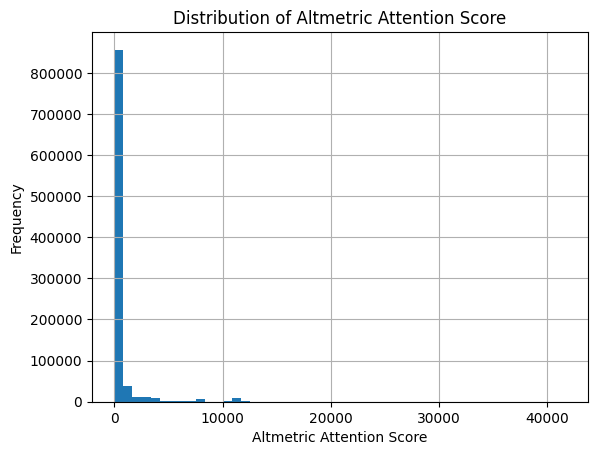

In [65]:
# Use a histogram to visualize the column 'Altmetric Attention Score'
altbsky['Altmetric Attention Score'].hist(bins=50)
plt.xlabel('Altmetric Attention Score')
plt.ylabel('Frequency')
plt.title('Distribution of Altmetric Attention Score')
# use a minimal theme
plt.style.use('ggplot')
plt.show()

In [67]:
# Check the type of the variable 'Sentiment Analysis'
altbsky['Sentiment Analysis'].dtype

CategoricalDtype(categories=['Strong negative', 'Neutral negative', 'Negative', 'Neutral',
                  'Positive', 'Neutral positive', 'Strong positive'],
, ordered=True, categories_dtype=object)

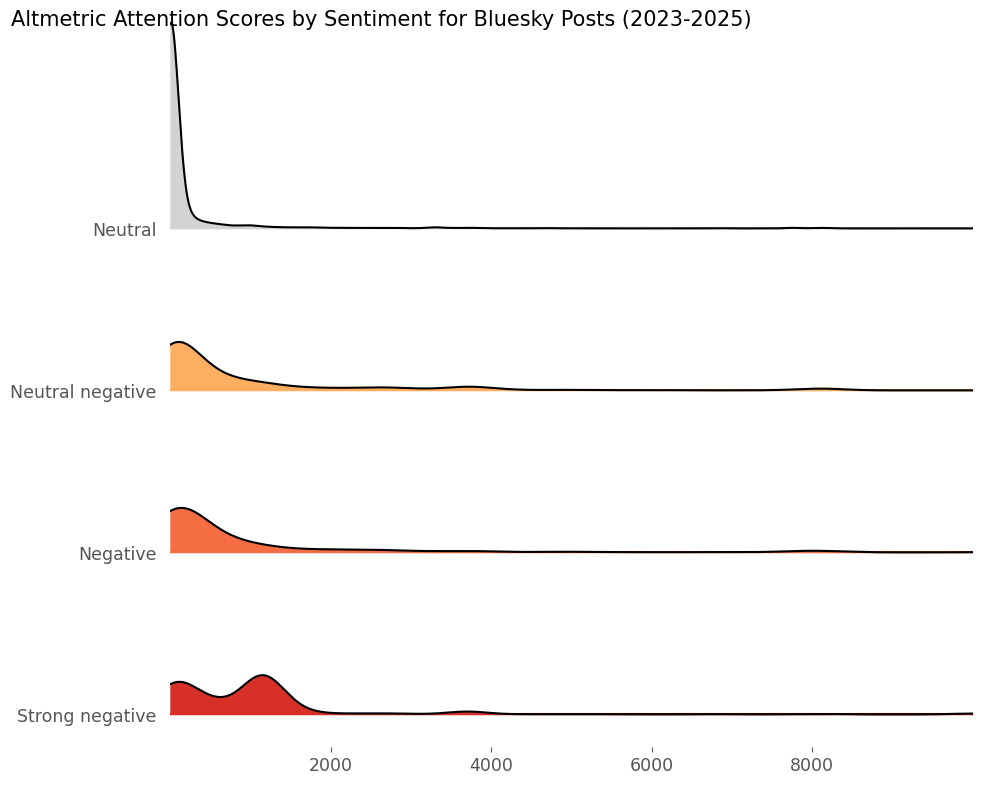

In [88]:
# Create a joy plot (ridgeline plot) using joypy of 'Altmetric Attention Score' by 'Sentiment'
import joypy as jp
import warnings
import matplotlib.pyplot as plt # Import plt for suptitle
from matplotlib.colors import ListedColormap # Import ListedColormap

# Adjust global font size for matplotlib plots (increase by 25%)
plt.rcParams.update({'font.size': 12.5}) # Default is 10, 10 * 1.25 = 12.5

# Define the full diverging color palette (Red to Green with Gray in middle)
full_diverging_colors = {
    'Strong positive': '#1A9850',
    'Neutral positive': '#66BD63',
    'Positive': '#A6D96A',
    'Neutral': '#D3D3D3',
    'Neutral negative': '#FDAE61',
    'Negative': '#F46D43',
    'Strong negative': '#D73027'
}

# Define the initial order for the joyplot (from most negative at top to most positive at bottom for direct mapping to full_diverging_colors)
sentiment_order_initial = ['Strong negative', 'Negative', 'Neutral negative', 'Neutral']

# Extract colors in the initial order
sentiment_colors_ordered = [full_diverging_colors[s] for s in sentiment_order_initial]

# Reverse the sentiment order for y-axis categories (to have Neutral at bottom, Strong negative at top)
sentiment_order_joyplot = list(reversed(sentiment_order_initial))

# Reverse the colors list to match the reversed order of categories on the y-axis
sentiment_colors = list(reversed(sentiment_colors_ordered))

# Create a colormap from the list of sentiment colors (this is still needed for consistency, even if not directly used by 'color')
cmap = ListedColormap(sentiment_colors)

# Convert 'Sentiment Analysis' to a categorical type with the specified order
altbsky.loc[:, 'Sentiment Analysis'] = pd.Categorical(altbsky['Sentiment Analysis'], categories=sentiment_order_joyplot, ordered=True)

# Generate the joyplot with untransformed data
# Using a context manager to suppress the FutureWarning from joypy
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    fig, axes = jp.joyplot(
        data=altbsky, # Ensure altbsky has numeric 'Altmetric Attention Score'
        column='Altmetric Attention Score', # Untransformed column
        by='Sentiment Analysis',
        color=sentiment_colors, # Use the custom color list for density curves
        title=None, # Temporarily set title to None to apply custom suptitle
        figsize=(10, 8), # Adjust figure size for better readability
        linecolor='black', # Add linecolor for clarity
        x_range=[0, 10000] # Set x-axis range from 0 to 10,000
        # Removed hist=True and bins=30 to revert to density curves
    )

# Set the suptitle with left alignment and adjusted font size
fig.suptitle('Altmetric Attention Scores by Sentiment for Bluesky Posts (2023-2025)', ha='left', x=0.02, y=0.98, fontsize=15)

# Make the plot background white
for ax in axes:
    ax.set_facecolor('white')
    ax.patch.set_facecolor('white') # For the axes background
    ax.grid(False) # Remove gridlines for a cleaner look
    for spine in ax.spines.values():
        spine.set_visible(False) # Remove spines for a cleaner look

# Set x-axis ticks and labels for the first subplot (assuming shared x-axis for joyplot)
if axes:
    bottom_ax = axes[0] # Get the bottom-most axis
    bottom_ax.set_xticks(range(0, 10001, 2000)) # Set ticks from 0 to 10000 every 2000
    bottom_ax.set_xticklabels([f'{x:,.0f}' for x in range(0, 10001, 2000)]) # Format tick labels with commas

# Adjust y-axis labels
plt.ylabel('')
plt.xlabel('') # Remove x-axis label

plt.show()

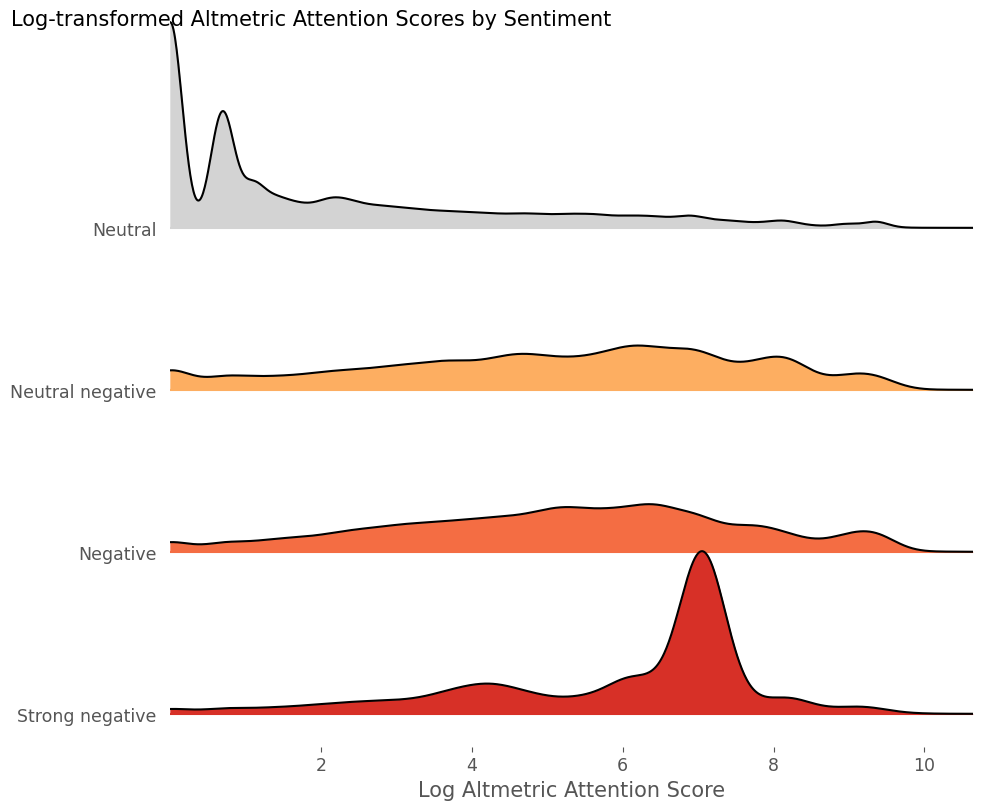

In [85]:
# Create a log-transformed score column
altbsky['Log Altmetric Attention Score'] = np.log(altbsky['Altmetric Attention Score'])

# Define a color palette: neutral = gray, neutral negative = orange, negative = light red, strong negative = red
diverging_colors_full = ['#D3D3D3', '#FDAE61', '#F46D43', '#D73027']

# Generate the joyplot with log-transformed data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    fig, axes = jp.joyplot(
        data=altbsky,
        column='Log Altmetric Attention Score',
        by='Sentiment Analysis',
        color=diverging_colors_full,
        title=None, # Temporarily set title to None to apply custom suptitle
        figsize=(10, 8), # Adjust figure size for better readability
        linecolor='black', # Add linecolor for clarity
        x_range=[0, np.log(altbsky['Altmetric Attention Score'].max())] # Set x-axis range from 0 to max log score
    )

# Set the suptitle with left alignment and increased font size
fig.suptitle('Log-transformed Altmetric Attention Scores by Sentiment', ha='left', x=0.02, y=0.98, fontsize=15)

# Make the plot background white
for ax in axes:
    ax.set_facecolor('white')
    ax.patch.set_facecolor('white') # For the axes background
    ax.grid(False) # Remove gridlines for a cleaner look
    for spine in ax.spines.values():
        spine.set_visible(False) # Remove spines for a cleaner look

# Adjust y-axis labels
plt.ylabel('')
plt.xlabel('Log Altmetric Attention Score')

plt.show()

## Plot the Mention Date

In [89]:
# Plot the Mention Date
altbsky['Mention Date'].describe()

/tmp/ipython-input-1523128027.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`


,Mention Date
count,948947
unique,789903
top,2025-01-22 05:00:00
freq,163


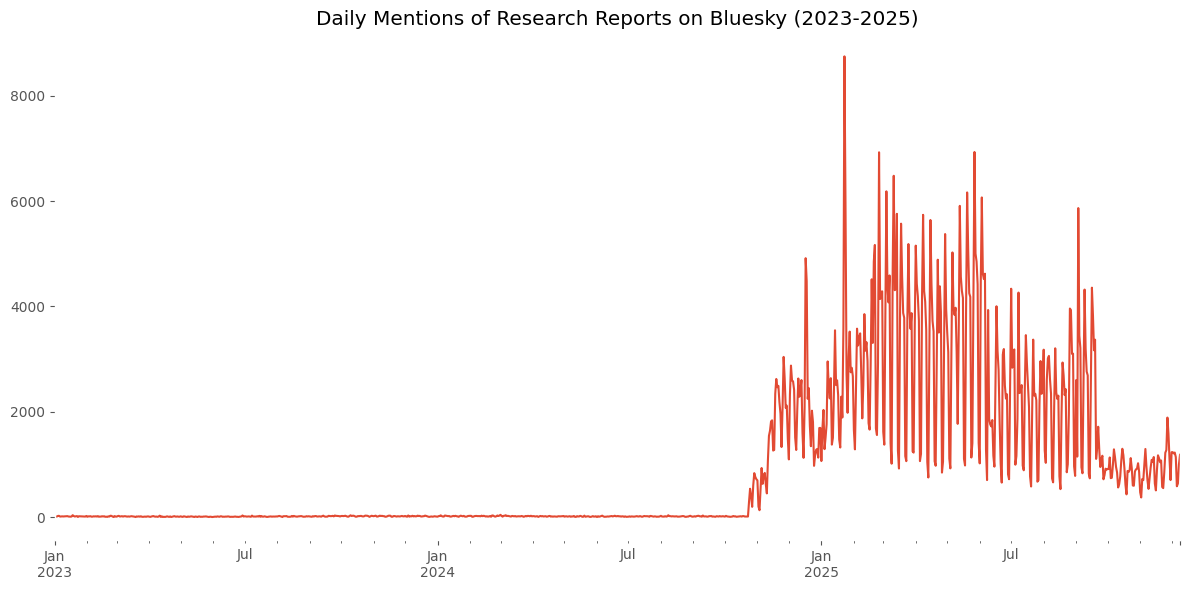

In [97]:
# Visualize the daily mentions on Bluesky

import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

# Reload dataset and restore state if altdata is not defined
if 'altbsky' not in locals():
    print("Reloading dataset...")
    # Use the correct CSV file name from initial load
    #altbsky = pd.read_csv('altmetrics-bsky-all-raw.xlsx', low_memory=False)
    # Apply preprocessing filters from previous steps
    altbsky.dropna(subset=['Altmetric Attention Score', 'Sentiment Analysis'], inplace=True)
    altbsky['Mention Date'] = pd.to_datetime(altbsky['Mention Date'], errors='coerce')
    altbsky.dropna(subset=['Mention Date'], inplace=True)
    # Add Publication Date preprocessing as it was applied earlier
    altbsky['Publication Date'] = pd.to_datetime(altbsky['Publication Date'], errors='coerce')
    altbsky.dropna(subset=['Publication Date'], inplace=True)

# Convert 'Mention Date' to datetime, coercing errors to NaT (Not a Time)
altbsky['Mention Date'] = pd.to_datetime(altbsky['Mention Date'], errors='coerce')

# Drop rows where 'Mention Date' conversion failed (if any)
altbsky.dropna(subset=['Mention Date'], inplace=True);

# Extract just the date part for daily aggregation
daily_mentions = altbsky['Mention Date'].dt.normalize().value_counts().sort_index()

# Plot the daily mentions using a minimal theme and plotnine library
plt.style.use('ggplot')
# use a minimal theme
p9.theme_set(p9.theme_minimal())
# remove gray background
plt.rcParams['axes.facecolor'] = 'white'


plt.figure(figsize=(12, 6))
daily_mentions.plot(kind='line')
plt.title('Daily Mentions of Research Reports on Bluesky (2023-2025)') # Updated title for full range
plt.xlabel('') # Added x-axis label
plt.ylabel('') # Added y-axis label
plt.annotate
plt.grid(False)
plt.tight_layout()
plt.show()

It appears that fall 2024 saw a great rise (1 years ago) in the number of Bluesky Research posts. I believe this was around the time of the Academic Twitter migration from Twitter/X to Bluesky. So this makes sense.Interestingly, the activity has decreased over 2025 (mirroring some posts I've read from Bluesky users on my feed).

In [92]:
# Convert 'Mention Date' to datetime objects to correctly find min/max
altbsky['Mention Date'] = pd.to_datetime(altbsky['Mention Date'], errors='coerce')

# Get the earliest and latest dates
earliest_date = altbsky['Mention Date'].min()
latest_date = altbsky['Mention Date'].max()

print(f"Earliest date in altbsky: {earliest_date}")
print(f"Latest date in altbsky: {latest_date}")

Earliest date in altbsky: 2023-01-01 14:00:03
Latest date in altbsky: 2025-12-09 23:51:28


In [95]:
# For each month in the dataset, compute the total mentions and report in a table
monthly_mentions = altbsky.groupby(altbsky['Mention Date'].dt.to_period('M')).size()
monthly_mentions

,0
Mention Date,
2023-01,471
2023-02,372
2023-03,394
2023-04,322
2023-05,280
2023-06,304
2023-07,389
2023-08,436
2023-09,512


Where did all the research commentors go? To LinkedIn I assume given my high levels of engagement on that platform. Sadly, LinkedIn does not provide an API for querying. Almetrics and their users have been asking LinkedIn for this feature (personal communication, 2025).

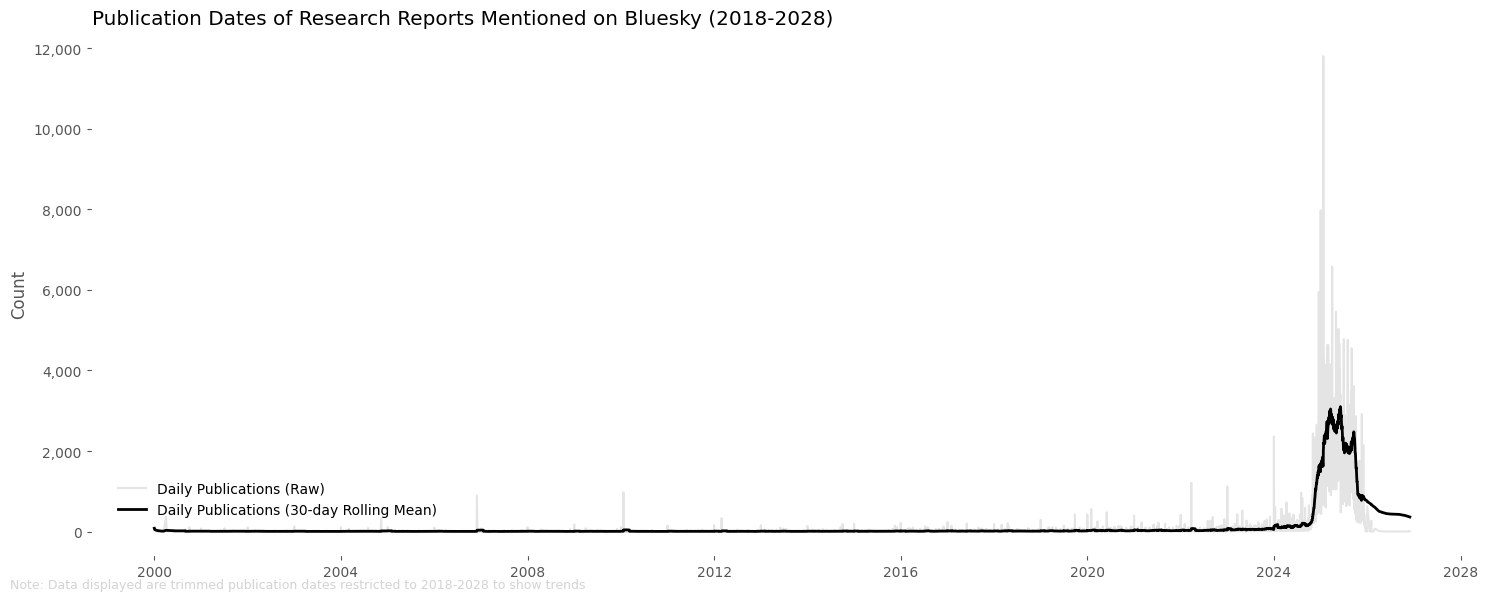

In [99]:
import matplotlib.pyplot as plt
import plotnine as p9
import pandas as pd
import matplotlib.ticker as ticker

# Ensure 'Publication Date' is in datetime format and count daily occurrences
altbsky['Publication Date'] = pd.to_datetime(altbsky['Publication Date'], errors='coerce')
altbsky.dropna(subset=['Publication Date'], inplace=True);

# Filter publication dates to a more recent and relevant timeframe (e.g., from 2005 onwards)
filtered_publications = altbsky[
    (altbsky['Publication Date'].dt.year >= 2000) &
    (altbsky['Publication Date'].dt.year <= 2028)
]
daily_publications = filtered_publications['Publication Date'].dt.normalize().value_counts().sort_index()

# Calculate a rolling mean to smooth the line
# Using a 30-day window as an example, adjust as needed
daily_publications_smoothed = daily_publications.rolling(window=30, min_periods=1).mean()

# Set plotting style consistent with previous minimal themes
plt.style.use('ggplot')
p9.theme_set(p9.theme_minimal())
plt.rcParams['axes.facecolor'] = 'white'

# Visualize the daily publication dates with a smoothed line
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(daily_publications.index, daily_publications.values, label='Daily Publications (Raw)', color='lightgray', alpha=0.6)
ax.plot(daily_publications_smoothed.index, daily_publications_smoothed.values, label='Daily Publications (30-day Rolling Mean)', color='black', linewidth=2)
ax.set_title('Publication Dates of Research Reports Mentioned on Bluesky (2018-2028)', loc='left') # Left-align title
ax.set_xlabel('')
ax.set_ylabel('Count') # Added label to apply formatter
ax.grid(False)

# Apply comma formatter to y-axis labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ensure x-axis labels are horizontal (rotation=0) if there are enough dates to trigger automatic rotation
plt.xticks(rotation=0, ha='center')

plt.figtext(0.01, 0.01, "Note: Data displayed are trimmed publication dates restricted to 2018-2028 to show trends", fontsize=9, ha='left', color='lightgray') # Added footnote with light gray color
plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.05), frameon=False) # Move legend to the bottom left, inside the plot, up slightly, and remove frame
plt.tight_layout()
plt.show()

In [100]:
# Convert 'Publication Date' to datetime objects to correctly find min/max
altbsky['Publication Date'] = pd.to_datetime(altbsky['Publication Date'], errors='coerce')

# Get the earliest and latest dates
earliest_date = altbsky['Publication Date'].min()
latest_date = altbsky['Publication Date'].max()

print(f"Earliest date in altbsky: {earliest_date}")
print(f"Latest date in altbsky: {latest_date}")

Earliest date in altbsky: 1731-01-01 00:00:00
Latest date in altbsky: 2026-11-30 00:00:00


 The Latest date article is just Early access: https://www.sciencedirect.com/science/article/pii/S2772810225000224

In [101]:
# Column names
altbsky.columns

Index(['Mention Type', 'Mention Date', 'Outlet or Author', 'Mention URL',
       'Sentiment Analysis', 'Research Output Title',
       'Journal/Collection Title', 'Output Type', 'Publication Date',
       'Altmetric Attention Score', 'Details Page URL',
       'Log Altmetric Attention Score'],
      dtype='object')

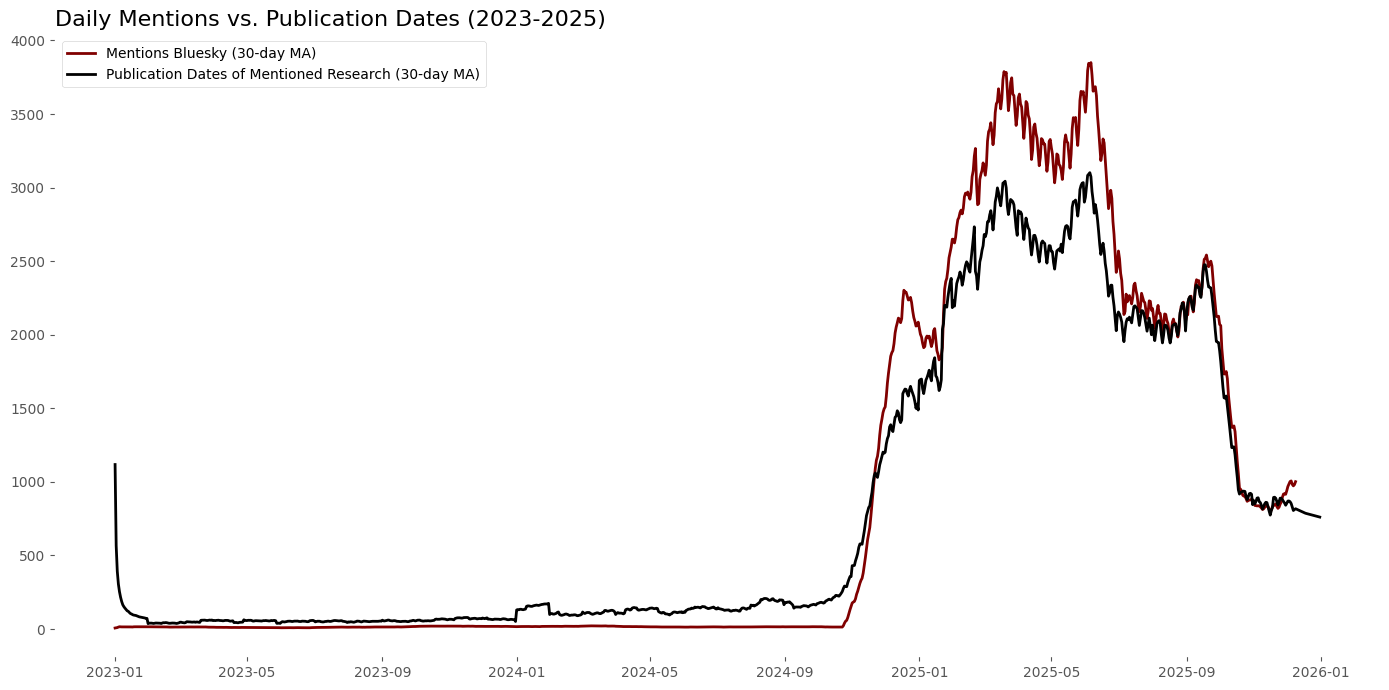

In [103]:
# Overlap the two line graphs above into one line graph

import matplotlib.pyplot as plt
import pandas as pd
import plotnine as p9

# Ensure 'Publication Date' is in datetime format and count daily occurrences
altbsky['Publication Date'] = pd.to_datetime(altbsky['Publication Date'], errors='coerce')
altbsky.dropna(subset=['Publication Date'], inplace=True)
# Filter publications to 2024-2025
daily_publications = altbsky[
    (altbsky['Publication Date'].dt.year >= 2023) &
    (altbsky['Publication Date'].dt.year <= 2025)
]['Publication Date'].dt.normalize().value_counts().sort_index()

# Ensure 'Mention Date' is in datetime format and count daily occurrences
altbsky['Mention Date'] = pd.to_datetime(altbsky['Mention Date'], errors='coerce')
altbsky.dropna(subset=['Mention Date'], inplace=True)
# Filter mentions to 2024-2025
daily_mentions = altbsky[
    (altbsky['Mention Date'].dt.year >= 2023) &
    (altbsky['Mention Date'].dt.year <= 2025)
]['Mention Date'].dt.normalize().value_counts().sort_index()

# Calculate 30-day rolling averages
daily_mentions_smoothed = daily_mentions.rolling(window=30, min_periods=1).mean()
daily_publications_smoothed = daily_publications.rolling(window=30, min_periods=1).mean()

# Set plotting style consistent with previous minimal themes
plt.style.use('ggplot')
p9.theme_set(p9.theme_minimal())
plt.rcParams['axes.facecolor'] = 'white'

# Create the overlapping line graph
fig, ax = plt.subplots(figsize=(14, 7))

# Plot smoothed daily mentions
ax.plot(daily_mentions_smoothed.index, daily_mentions_smoothed.values, label='Mentions Bluesky (30-day MA)', color='maroon', linewidth=2)

# Plot smoothed daily publications
ax.plot(daily_publications_smoothed.index, daily_publications_smoothed.values, label='Publication Dates of Mentioned Research (30-day MA)', color='black', linewidth=2)

# Set title and labels
ax.set_title('Daily Mentions vs. Publication Dates (2023-2025)', fontsize=16, loc='left')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(False) # Keep the minimalist grid setting

# Add legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [105]:
# First, ensure 'Publication Date' is clean and within a reasonable range to avoid overflow.

# Filter out extremely old publication dates (e.g., before 2022-01-01) which are likely outliers for commenting; most comment is not in the left tail of the line graph.
altbsky_filtered = altbsky[altbsky['Publication Date'] >= '2022-01-01'].copy()

# Compute the delay between Mentions and Publication Dates for each individual record
# This is done by subtracting the 'Publication Date' from the 'Mention Date' for each row in the filtered DataFrame.
# Convert the timedelta to days.
delay = (altbsky_filtered['Mention Date'] - altbsky_filtered['Publication Date']).dt.days
delay.describe()

,0
count,884046.000000
mean,39.926995
std,166.449873
min,-885.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,1437.000000


The delay between publication and Bluesky commentary on that publication is on average 40 days (middle 50% = 1-7 days).

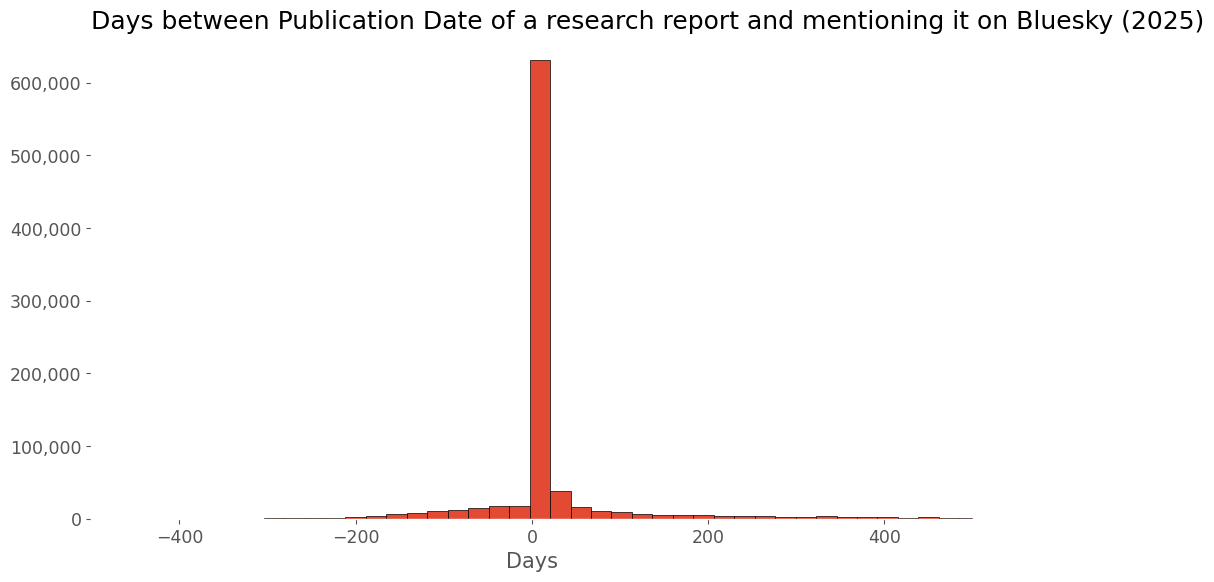

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker # Import ticker for formatting

# 'delay' is already in days (integer type), so .dt.days is not needed and causes an error.
# Just assign 'delay' directly.
delay_in_days = delay

plt.figure(figsize=(10, 6))
plt.hist(delay_in_days, bins=100, edgecolor='black')

plt.title('Days between Publication Date of a research report and mentioning it on Bluesky (2025)', loc='left') # Left-align title
plt.xlabel('Days') # Remove x-axis label
plt.ylabel('') # Remove y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Scale x-axis from -500 to 500 days
plt.xlim(-500, 500)

# Add commas to the y-axis
ax = plt.gca() # Get current axes
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

Typically, the delay between an article being published vs. commented upon on Bluesky is 1-20 days. The first few weeks matter.

In [109]:
# Count the number of Mentions by the column 'Journal/Collection Title'
altbsky['Journal/Collection Title'].value_counts().head(20)

,count
Journal/Collection Title,
arXiv,340717
bioRxiv,91654
Nature,18980
Science,13747
medRxiv,13475
British Medical Journal,9149
JAMA: Journal of the American Medical Association,8758
The Lancet,8480
Proceedings of the National Academy of Sciences of the United States of America,8327


People more commonly mentions research reports on Bluesky (filtering by neutral and negative sentiment) if they are from preprint servers like bioRxiv, medRxiv, and arXiv. Articles from elite journals like Nature, Nature Communications, BMJ, Science, Medical Journal of Australia, Advanced Science, PNAS, Scientific Reports, Cell Reports, Nature Biotechnology, JAMA, and Science Advances are also mentioned often.

In [112]:
# Find the top 300 most frequent Outlet of Author and sort them by sentiment

top_500_authors = altbsky['Outlet or Author'].value_counts().head(500)

# Convert to a dataframe
top_authors_df = pd.DataFrame(top_500_authors)
top_500_authors.head(50)

,count
Outlet or Author,
bioRxivpreprint,34005
arXiv cs.LG Machine Learning,20907
arXiv cs.CV Computer Vision and Pattern Recognition,17434
arXiv cs.AI Artificial Intelligence,12978
phy_papers,12507
arXiv cs.CL Computation and Language,12001
medRxivpreprint,10746
arXiv quant-ph Quantum Physics,10224
arXiv bot (cond-mat),7913


The top authors are preprint servers and elite journals.

In [113]:
top_500_authors.sample(50)

,count
Outlet or Author,
Molecular Cell,249
Sciences,3047
Craig A. Goodman,186
arXiv q-fin.MF Mathematical Finance,212
arXiv math.RT Representation Theory,1529
Ryo Yokoyama,255
arXiv cs.DS Data Structures and Algorithms,1604
YC Chu,127
arXiv eess.AS Audio and Speech Processing,1362


This seems about right, as bots with auto-posting of preprints dominate. I also recognize the researcher "Olivia Guest" for my own social media feeds. She does post quite often, so this is not a surprise.

In [116]:
# Get the list of top 300 authors
top_500_authors_list = top_500_authors.index.tolist()

# Ensure 'Outlet or Author' is treated as string type to avoid mixed-type issues
altbsky['Outlet or Author'] = altbsky['Outlet or Author'].astype(str)

# Calculate sentiment counts for each author
sentiment_counts = altbsky.groupby(['Outlet or Author', 'Sentiment Analysis']).size().unstack(fill_value=0)

# Calculate total mentions for each author
total_mentions = altbsky.groupby('Outlet or Author').size()

# Calculate sentiment proportions
sentiment_proportions_df = sentiment_counts.div(total_mentions, axis=0)

# Reset index to make 'Outlet or Author' a column
sentiment_proportions_df = sentiment_proportions_df.reset_index()

# Rename columns for clarity
sentiment_proportions_df.columns.name = None
sentiment_proportions_df = sentiment_proportions_df.rename(columns={col: f'{col} Proportion' for col in sentiment_proportions_df.columns if col not in ['Outlet or Author']})

# Add 'Total Mentions' column
sentiment_proportions_df['Total Mentions'] = total_mentions.reindex(sentiment_proportions_df['Outlet or Author']).values


# Filter sentiment_proportions_df for these top authors
top_authors_sentiment = sentiment_proportions_df[sentiment_proportions_df['Outlet or Author'].isin(top_500_authors_list)].copy()

# Calculate a combined negative sentiment score
top_authors_sentiment['Combined Negative Proportion'] = \
    top_authors_sentiment['Strong negative Proportion'] + top_authors_sentiment['Negative Proportion']

# Sort by combined negative sentiment proportion in descending order
most_negative_authors = top_authors_sentiment.sort_values(by='Combined Negative Proportion', ascending=False)

# Display the top 20 authors with the most negative sentiment, converting proportions to percentages
print("Top Authors with the Most Strong Negative and Negative Sentiments:")
display(most_negative_authors[[
    'Outlet or Author',
    'Strong negative Proportion',
    'Negative Proportion',
    'Combined Negative Proportion',
    'Total Mentions'
]].head(100).style.format({
    'Strong negative Proportion': '{:.2%}',
    'Negative Proportion': '{:.2%}',
    'Combined Negative Proportion': '{:.2%}'
}))

/tmp/ipython-input-2887970505.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Top Authors with the Most Strong Negative and Negative Sentiments:


,Outlet or Author,Strong negative Proportion,Negative Proportion,Combined Negative Proportion,Total Mentions
103754,Vinu Arumugham #MAHA,23.94%,48.59%,72.54%,284
65201,Manuel Morales,18.95%,43.79%,62.75%,153
62571,Lonni BesanÁon,9.32%,49.07%,58.39%,161
66850,Mark Ungrin,20.66%,33.23%,53.89%,334
106200,Ying Cao,24.37%,27.88%,52.24%,513
24293,Damien BARRAUD MD,9.15%,31.69%,40.85%,142
35835,Fabrice FRANK,4.83%,32.41%,37.24%,290
110097,geeknik,8.41%,28.41%,36.81%,345
65402,Marc Veldhoen,6.46%,29.19%,35.65%,418
25462,Darren Dahly,8.06%,26.61%,34.68%,124


In [117]:
# Write this dataframe to .csv
most_negative_authors.to_csv('most_negative_authors.csv', index=False)

I recognize some of these from the digital ethnography I conducted last years. Sleuths who detect problematic papers are: Lonni and Fabrice. I also see Darren Dahly, a skeptical statistician who posts critical tasks on methods, statistics, and publications.

Wow! This sort of list would have greatly helped me in my previous study. It'll be nice to extend to other social media sites, as it helps me find skeptical commenters who made induce scholarly revisions like retractions and corrections. Most of these Outlet or Author data points are new to me.

## Analyze Genders of Post Authors

In [119]:
import gender_guesser.detector as gender
import pandas as pd

# Initialize the gender detector
d = gender.Detector()

# Remove rows where 'Outlet or Author' is the string 'nan'
altbsky = altbsky[altbsky['Outlet or Author'] != 'nan']

def get_gender(name):
    if pd.isna(name):
        return 'unknown'
    name = str(name).strip()
    # Exclude numeric identifiers or empty strings after stripping
    if name.isnumeric() or name == '':
        return 'unknown'
    # Extract the first word and capitalize it for better detection
    first_name = name.split()[0].capitalize()
    return d.get_gender(first_name)

# Apply the function to create the 'Gender' column
altbsky['Gender'] = altbsky['Outlet or Author'].apply(get_gender)

# Display the first few rows of the updated DataFrame
altbsky[['Outlet or Author', 'Gender']].head(20)

/tmp/ipython-input-2787596269.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Outlet or Author,Gender
0,Not a Confederate,unknown
1,phy_papers,unknown
2,Anton Dekker ? / AntonDekker@mastodon.nl,male
4,Fern·n Ag¸ero,unknown
5,Guus Beugelink,male
6,Christopher Mootham,male
8,Infectious Diseases Fellowship at Indiana Univ...,unknown
9,kinetoplastids papers,unknown
11,Monique Nierop ?,female
13,Hiro Nakagami,mostly_female


In [120]:
# 1. Display value counts of 'Gender'
print("Original Gender Counts:")
print(altbsky['Gender'].value_counts())

# 2. Simplify gender mapping
gender_mapping = {'mostly_male': 'male', 'mostly_female': 'female', 'andy': 'androgynous'}
altbsky['Gender'] = altbsky['Gender'].replace(gender_mapping)

# 3. Create a filtered DataFrame for 'male' and 'female'
filtered_gender_data = altbsky[altbsky['Gender'].isin(['male', 'female', 'androgynous'])].copy()

# 6. Print the size of the filtered DataFrame
print(f"\nFiltered Data Size (Male/Female/Androgynous only): {len(filtered_gender_data)}")

Original Gender Counts:
Gender
unknown          681523
male             131998
female            60131
mostly_female     12994
mostly_male        8075
andy               5745
Name: count, dtype: int64

Filtered Data Size (Male/Female/Androgynous only): 218943


/tmp/ipython-input-3405781663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [121]:
print("Updated Gender Counts after mapping:")
print(altbsky['Gender'].value_counts())

Updated Gender Counts after mapping:
Gender
unknown        681523
male           140073
female          73125
androgynous      5745
Name: count, dtype: int64


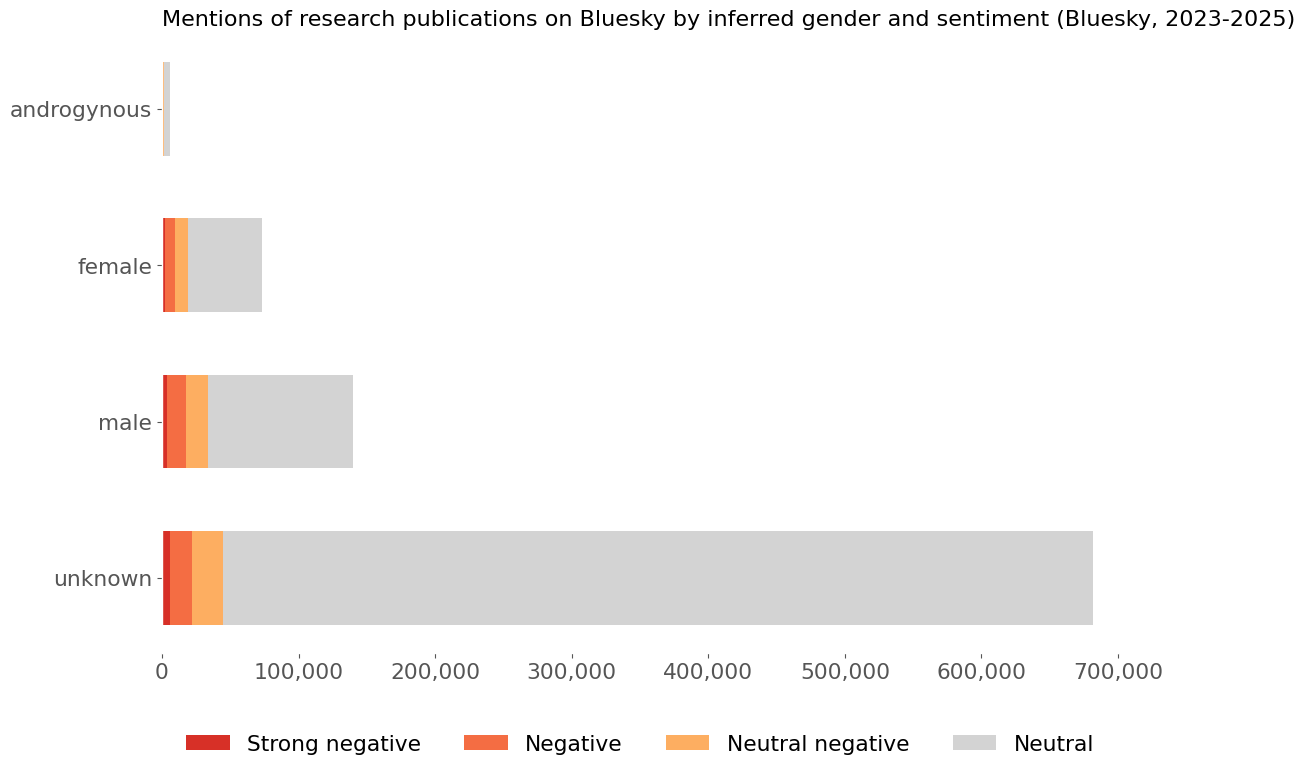

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import gender_guesser.detector as gender
import numpy as np

# Adjust global font size for matplotlib plots (increase by 25% from previous 12.5)
plt.rcParams.update({'font.size': 15.625}) # 12.5 * 1.25 = 15.625

# Re-initialize the gender detector if needed (to ensure d is available)
if 'd' not in locals():
    d = gender.Detector()

# Define get_gender function (re-added for robustness if cell run independently)
def get_gender(name):
    if pd.isna(name):
        return 'unknown'
    name = str(name).strip()
    if name.isnumeric() or name == '':
        return 'unknown'
    first_name = name.split()[0].capitalize()
    return d.get_gender(first_name)

# Ensure 'altbsky' reflects the latest gender processing (filtering 'nan' and mapping)
# These steps were performed in XTUrM9aYW4ZO and Rge4nVB_XBBr, but re-applying
# ensures correctness if this cell is run standalone or state is lost.
# Create a copy to avoid SettingWithCopyWarning on subsequent operations
altbsky_processed = altbsky[altbsky['Outlet or Author'] != 'nan'].copy()
if 'Gender' not in altbsky_processed.columns or 'andy' in altbsky_processed['Gender'].unique():
    altbsky_processed['Gender'] = altbsky['Outlet or Author'].apply(get_gender)
    gender_mapping = {'mostly_male': 'male', 'mostly_female': 'female', 'andy': 'androgynous'}
    altbsky_processed['Gender'] = altbsky_processed['Gender'].replace(gender_mapping)


# Define the desired order of gender categories for the y-axis (top to bottom)
gender_order_for_plot = ['unknown', 'male', 'female', 'androgynous']
# Ensure all specified genders are present in the data for plotting
gender_categories_present = [g for g in gender_order_for_plot if g in altbsky_processed['Gender'].unique()]

# Define the actual sentiment categories present in the data and their corresponding colors
# (Removed positive sentiments as they are not present in altbsky['Sentiment Analysis'].value_counts())
sentiment_order_for_plot = [
    'Strong negative', 'Negative', 'Neutral negative', 'Neutral'
]
sentiment_colors_diverging = [
    '#D73027', '#F46D43', '#FDAE61', '#D3D3D3'
]

# Calculate the counts of 'Sentiment Analysis' vs 'Gender'
# Use the processed altbsky_processed data to include all gender categories
gender_sentiment_counts = pd.crosstab(
    altbsky_processed['Gender'],
    altbsky_processed['Sentiment Analysis'],
    dropna=False # Keep NaN values if any remain for sentiments
)

# Reindex rows (gender) and columns (sentiment) for consistent order
gender_sentiment_counts = gender_sentiment_counts.reindex(index=gender_categories_present, columns=sentiment_order_for_plot, fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(gender_categories_present))
height = 0.6 # Bar height

# Initialize a base for stacking
left_stack = pd.Series(0, index=gender_categories_present)

# Iterate through sentiments to plot stacked bars for each gender
for i, sentiment in enumerate(sentiment_order_for_plot):
    ax.barh(y_pos, gender_sentiment_counts[sentiment], height=height,
            left=left_stack, color=sentiment_colors_diverging[i],
            label=sentiment)
    left_stack += gender_sentiment_counts[sentiment]

# Set labels, title, and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(gender_categories_present) # Use the sorted gender categories for labels
ax.set_xlabel('', fontsize=15.625) # Use updated font size for axis labels
ax.set_title('Mentions of research publications on Bluesky by inferred gender and sentiment (Bluesky, 2023-2025)', fontsize=16, loc='left') # Decrease title size to 16 points
ax.set_ylabel('', fontsize=15.625) # Use updated font size for axis labels

# Adjust x-axis ticks to show absolute values (commas)
xtick_locs = ax.get_xticks()
ax.set_xticks(xtick_locs) # Set the tick locations explicitly
ax.set_xticklabels([f'{int(x):,.0f}' for x in xtick_locs]) # Format with commas

# Scale x-axis from 0-700,000
ax.set_xlim(0, 700000)

# Add legend (ensure it doesn't overlap too much and uses sentiment only)
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels.append(l)
        unique_handles.append(h)

# Adjust bbox_to_anchor to position the legend inside and above the 'unknown' bar
ax.legend(unique_handles, unique_labels, title='', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(unique_labels), frameon=False) # Remove 'Sentiment' title

plt.tight_layout()
plt.show()

Across genders, negative comments are far less common compared to neutral comments. Strong neegative comments are fairly rare overall.

## Infer Ethicity of Bluesky Authors

In [128]:
import pandas as pd
from ethnicolr import pred_wiki_name
import numpy as np
import warnings
import logging

# Suppress warnings and logging
warnings.simplefilter(action='ignore', category=FutureWarning)
logging.getLogger('ethnicolr').setLevel(logging.ERROR)

# Reload dataset and restore state if altdata is not defined
if 'altbsky' not in locals():
    print("Reloading dataset...")
    # Use the correct XLSX file name from initial load
    altbsky = pd.read_excel('altmetrics-bsky-all-raw.xlsx') # Changed to pd.read_excel
    # Apply preprocessing filters from previous steps
    altbsky.dropna(subset=['Altmetric Attention Score', 'Sentiment Analysis'], inplace=True)
    altbsky['Mention Date'] = pd.to_datetime(altbsky['Mention Date'], errors='coerce')
    altbsky.dropna(subset=['Mention Date'], inplace=True)
    # Add Publication Date preprocessing as it was applied earlier
    altbsky['Publication Date'] = pd.to_datetime(altbsky['Publication Date'], errors='coerce')
    altbsky.dropna(subset=['Publication Date'], inplace=True)


# The key to ignoring organizations is already implemented by filtering based on inferred gender.
# Authors with 'unknown' gender (likely organizations, bots, or non-human entities)
# are already excluded from the ethnicity prediction process in the subsequent step.
# This ensures that ethnicity prediction is only attempted for likely human names.

# 1. Prepare Unique Names
# Extract unique values, drop NaNs
unique_authors = altbsky['Outlet or Author'].dropna().unique()

# Create a DataFrame for unique names
names_df = pd.DataFrame(unique_authors, columns=['Outlet or Author'])

# Clean names: ensure string, strip whitespace, exclude numeric IDs
names_df['Outlet or Author'] = names_df['Outlet or Author'].astype(str).str.strip()
names_df = names_df[~names_df['Outlet or Author'].str.isnumeric()]
names_df = names_df[names_df['Outlet or Author'] != '']

# Create 'fname' and 'lname' columns required by pred_wiki_name
names_df['fname'] = names_df['Outlet or Author'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
names_df['lname'] = names_df['Outlet or Author'].apply(lambda x: x.split()[-1] if len(x.split()) > 0 else '')

print(f"Predicting ethnicity for {len(names_df)} unique names...")

# 2. Predict Ethnicity
# Use pred_wiki_name with both last name and first name columns
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    predictions = pred_wiki_name(names_df, 'lname', 'fname')

# 3. Merge Results
# Avoid duplicate columns if run multiple times
if 'Predicted Ethnicity' in altbsky.columns:
    altbsky.drop(columns=['Predicted Ethnicity'], inplace=True)

# Merge the 'race' column back into the main dataframe
altbsky = altbsky.merge(predictions[['Outlet or Author', 'race']], on='Outlet or Author', how='left')

# Rename the column for clarity
altbsky.rename(columns={'race': 'Predicted Ethnicity'}, inplace=True);

# 4. Inspect
# Display the first few rows with the new column
print(altbsky[['Outlet or Author', 'Gender', 'Predicted Ethnicity']].head(10))

Predicting ethnicity for 115766 unique names...
                                    Outlet or Author   Gender  \
0                                  Not a Confederate  unknown   
1                                         phy_papers  unknown   
2           Anton Dekker ? / AntonDekker@mastodon.nl     male   
3                                      Fern·n Ag¸ero  unknown   
4                                     Guus Beugelink     male   
5                                Christopher Mootham     male   
6  Infectious Diseases Fellowship at Indiana Univ...  unknown   
7                              kinetoplastids papers  unknown   
8                                   Monique Nierop ?   female   
9                                      Hiro Nakagami   female   

                     Predicted Ethnicity  
0                GreaterEuropean,British  
1    GreaterEuropean,WestEuropean,Nordic  
2                GreaterEuropean,British  
3  GreaterEuropean,WestEuropean,Germanic  
4                Grea

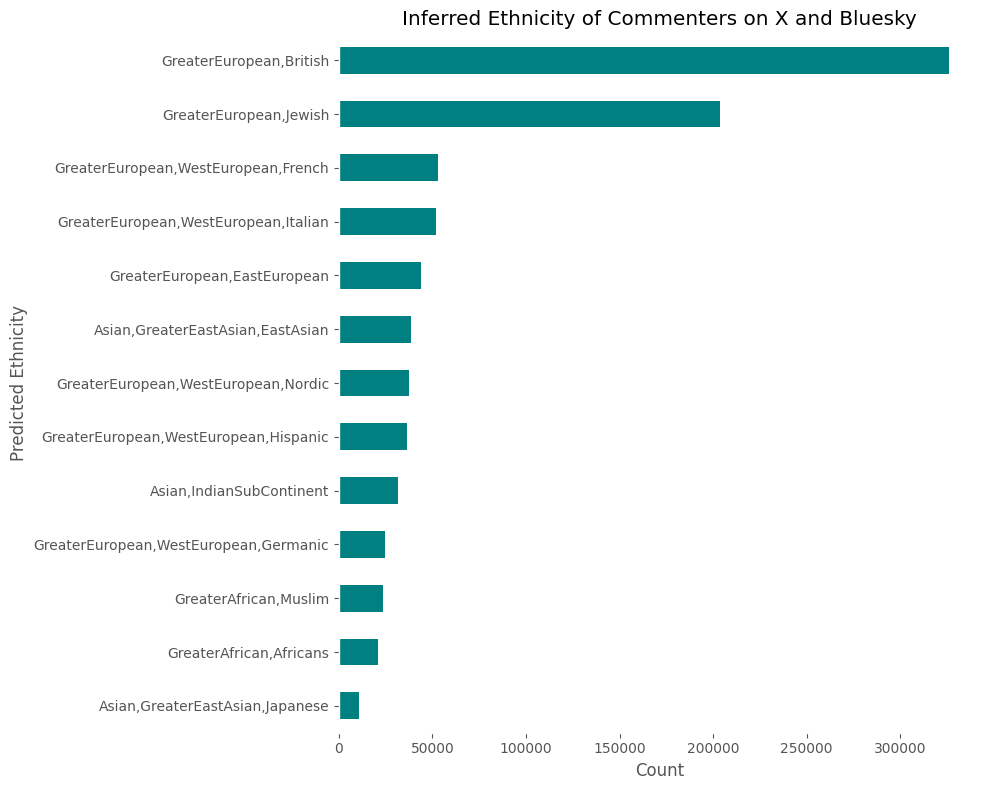

Inferred Ethnicity Counts:
Predicted Ethnicity
GreaterEuropean,British                  326321
GreaterEuropean,Jewish                   203857
GreaterEuropean,WestEuropean,French       52956
GreaterEuropean,WestEuropean,Italian      51824
GreaterEuropean,EastEuropean              43693
Asian,GreaterEastAsian,EastAsian          38430
GreaterEuropean,WestEuropean,Nordic       37249
GreaterEuropean,WestEuropean,Hispanic     36645
Asian,IndianSubContinent                  31785
GreaterEuropean,WestEuropean,Germanic     24647
GreaterAfrican,Muslim                     23688
GreaterAfrican,Africans                   21101
Asian,GreaterEastAsian,Japanese           10652
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each inferred ethnicity category
ethnicity_counts = altbsky['Predicted Ethnicity'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
ethnicity_counts.plot(kind='barh', color='teal')

# Add title and labels
plt.title('Inferred Ethnicity of Commenters on Bluesky (late 2025)')
plt.xlabel('Count')
plt.ylabel('Predicted Ethnicity')

# Invert y-axis to have the highest count at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Print the value counts
print("Inferred Ethnicity Counts:")
print(ethnicity_counts)

/tmp/ipython-input-3940251530.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


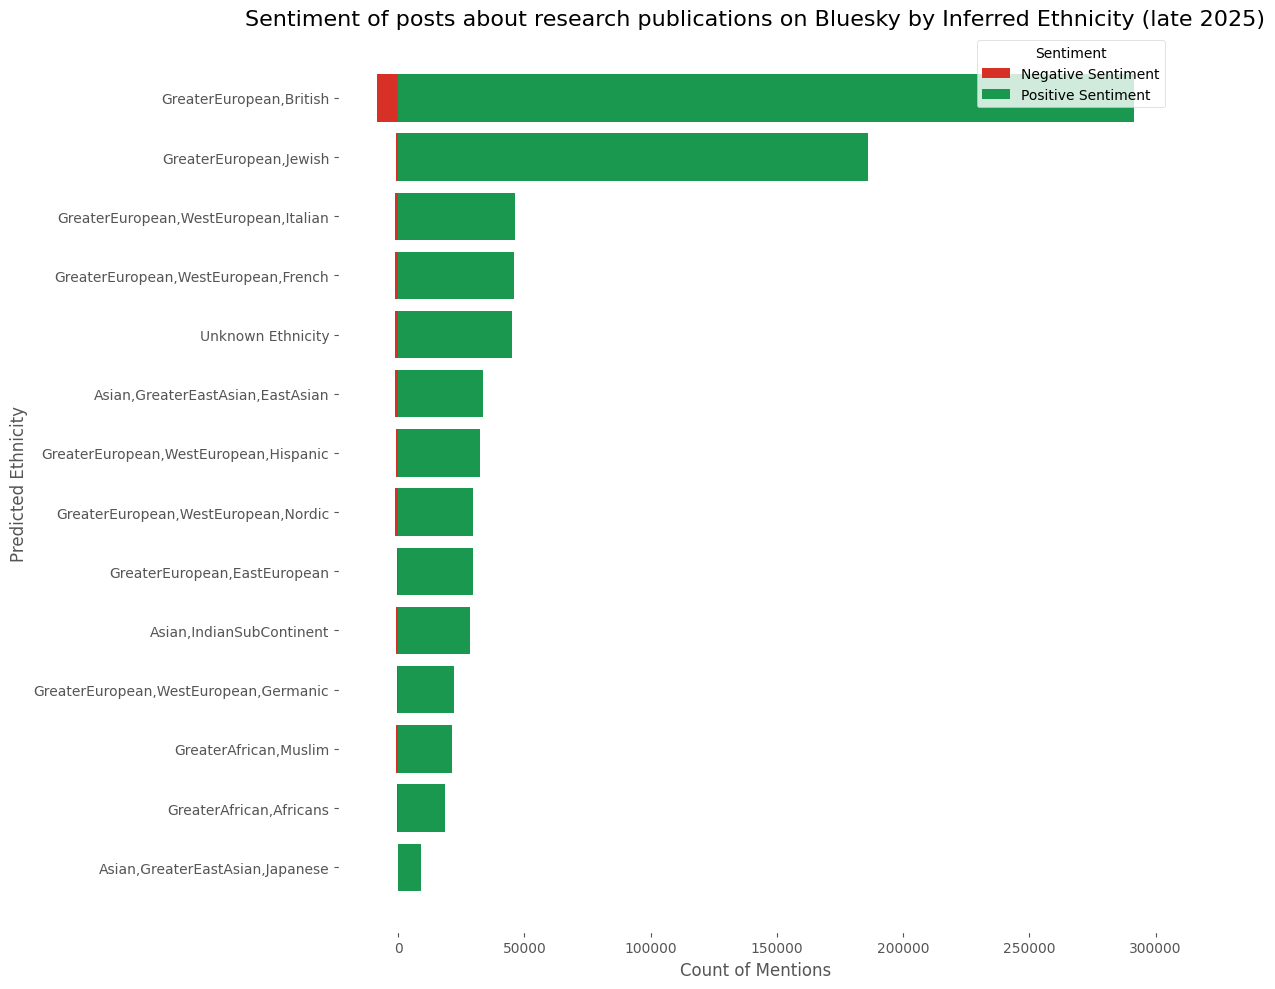

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define sentiment categories for aggregation
positive_sentiments = ['Strong positive', 'Positive', 'Neutral positive']
negative_sentiments = ['Strong negative', 'Negative', 'Neutral negative']

# Fill NaN values in 'Predicted Ethnicity' with a placeholder string to avoid plotting errors
altbsky['Predicted Ethnicity'] = altbsky['Predicted Ethnicity'].fillna('Unknown Ethnicity')

# Recalculate cross-tabulation for all sentiments
ethnicity_sentiment_counts_full = pd.crosstab(altbsky['Predicted Ethnicity'], altbsky['Sentiment Analysis'], dropna=False)

# Aggregate positive and negative counts for each ethnicity
ethnicity_sentiment_counts_full['Positive Sum'] = ethnicity_sentiment_counts_full[positive_sentiments].sum(axis=1)
ethnicity_sentiment_counts_full['Negative Sum'] = ethnicity_sentiment_counts_full[negative_sentiments].sum(axis=1)

# Create a DataFrame for plotting, focusing on the aggregated positive and negative sums
diverging_data = ethnicity_sentiment_counts_full[['Negative Sum', 'Positive Sum']].copy()

# Filter out ethnicities with no positive or negative mentions to clean the plot
diverging_data = diverging_data[(diverging_data['Positive Sum'] > 0) | (diverging_data['Negative Sum'] > 0)]

# Sort by the sum of absolute values (total mentions) for better readability on the y-axis
diverging_data['Total Mentions'] = diverging_data['Positive Sum'] + diverging_data['Negative Sum']
diverging_data = diverging_data.sort_values('Total Mentions', ascending=True)

# Define colors for positive and negative sentiments
positive_color = '#1A9850'  # Green
negative_color = '#D73027'  # Red

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Negative Sum to the left (multiply by -1 for diverging effect)
ax.barh(diverging_data.index, -diverging_data['Negative Sum'], color=negative_color, label='Negative Sentiment')

# Plot Positive Sum to the right
ax.barh(diverging_data.index, diverging_data['Positive Sum'], color=positive_color, label='Positive Sentiment')

# Add title and labels
ax.set_title('Sentiment of posts about research publications on Bluesky by Inferred Ethnicity (late 2025)', fontsize=16)
ax.set_xlabel('Count of Mentions', fontsize=12)
ax.set_ylabel('Predicted Ethnicity', fontsize=12)

# Adjust x-axis ticks to show absolute values on both sides
xticks_vals = ax.get_xticks()
ax.set_xticklabels([int(abs(x)) for x in xticks_vals])

# Add legend
ax.legend(title='Sentiment', loc='upper right')

plt.tight_layout()
plt.show()

# Task
Generate a diverging stacked bar chart to visualize sentiment distribution across different predicted ethnicities for both male and female authors.

First, filter the `altbsky` DataFrame to include only 'male' and 'female' genders and valid predicted ethnicities (excluding 'Unknown Ethnicity' or NaN values). Then, group the filtered data by 'Predicted Ethnicity', 'Gender', and 'Sentiment Analysis' to count occurrences. Structure the data so that male sentiment counts extend to the positive x-axis and female sentiment counts extend to the negative x-axis. Ensure that sentiment categories are stacked within each gender's bar for every ethnicity on the y-axis, using distinct colors for each sentiment category. Finally, ensure the x-axis tick labels display absolute values.

## Generate Diverging Stacked Bar Chart for Sentiment by Gender and Ethnicity

### Subtask:
Prepare the `altbsky` DataFrame by filtering for 'male' and 'female' genders and valid predicted ethnicities. Group the data by 'Predicted Ethnicity', 'Gender', and 'Sentiment Analysis' to count occurrences. Separate these counts into male and female dataframes. Finally, plot these as a diverging stacked bar chart where female sentiment counts extend to the left (negative x-axis) and male sentiment counts extend to the right (positive x-axis), with sentiment categories stacking within each gender's bar for every ethnicity on the y-axis. Use distinct colors for sentiments and ensure x-axis ticks show absolute values.


**Reasoning**:
First, I will filter the `altbsky` DataFrame to include only 'male' or 'female' genders and valid (non-'Unknown Ethnicity' and non-NaN) predicted ethnicities, storing this in `filtered_ethnicity_gender_data` as instructed.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'Predicted Ethnicity' is handled correctly. If it's still 'Unknown Ethnicity' from previous steps, filter it out.
altbsky['Predicted Ethnicity'] = altbsky['Predicted Ethnicity'].replace('Unknown Ethnicity', np.nan)

# 1. Filter the altbsky DataFrame for 'male' or 'female' genders and valid predicted ethnicities
filtered_ethnicity_gender_data = altbsky[
    altbsky['Gender'].isin(['male', 'female']) &
    altbsky['Predicted Ethnicity'].notna()
].copy()

print(f"Filtered data size: {len(filtered_ethnicity_gender_data)} rows")
print("First 5 rows of filtered_ethnicity_gender_data:")
print(filtered_ethnicity_gender_data[['Outlet or Author', 'Gender', 'Predicted Ethnicity', 'Sentiment Analysis']].head())

Filtered data size: 372308 rows
First 5 rows of filtered_ethnicity_gender_data:
        Outlet or Author  Gender                   Predicted Ethnicity  \
0         Dale Hennessey    male               GreaterEuropean,British   
2          Joseph Marcus    male  GreaterEuropean,WestEuropean,Italian   
5   Heidrun Wiesenm¸ller  female   GreaterEuropean,WestEuropean,Nordic   
8           Paul DeCampo    male   GreaterEuropean,WestEuropean,French   
11       Shannon Mattern  female               GreaterEuropean,British   

   Sentiment Analysis  
0    Neutral positive  
2    Neutral positive  
5            Negative  
8    Neutral positive  
11   Neutral positive  


**Reasoning**:
Next, I will group the filtered data by 'Predicted Ethnicity', 'Gender', and 'Sentiment Analysis' and count the occurrences, then reset the index to prepare for pivoting.



In [ ]:
grouped_data = filtered_ethnicity_gender_data.groupby(['Predicted Ethnicity', 'Gender', 'Sentiment Analysis']).size().reset_index(name='Count')

print("First 5 rows of grouped_data:")
print(grouped_data.head())

First 5 rows of grouped_data:
                Predicted Ethnicity  Gender Sentiment Analysis  Count
0  Asian,GreaterEastAsian,EastAsian  female    Strong negative     93
1  Asian,GreaterEastAsian,EastAsian  female   Neutral negative     74
2  Asian,GreaterEastAsian,EastAsian  female           Negative    116
3  Asian,GreaterEastAsian,EastAsian  female            Neutral    436
4  Asian,GreaterEastAsian,EastAsian  female           Positive   2488


**Reasoning**:
I will create a pivot table from the grouped data to arrange 'Predicted Ethnicity' as rows, with 'Gender' and 'Sentiment Analysis' as columns, populated by their respective counts.



In [ ]:
pivot_data = grouped_data.pivot_table(index='Predicted Ethnicity', columns=['Gender', 'Sentiment Analysis'], values='Count', fill_value=0)

print("First 5 rows of pivot_data:")
print(pivot_data.head())

First 5 rows of pivot_data:
Gender                                    female                            \
Sentiment Analysis               Strong negative Neutral negative Negative   
Predicted Ethnicity                                                          
Asian,GreaterEastAsian,EastAsian            93.0             74.0    116.0   
Asian,GreaterEastAsian,Japanese             13.0              8.0     14.0   
Asian,IndianSubContinent                    58.0             53.0     73.0   
GreaterAfrican,Africans                     19.0             13.0     56.0   
GreaterAfrican,Muslim                      104.0             74.0    119.0   

Gender                                                              \
Sentiment Analysis               Neutral Positive Neutral positive   
Predicted Ethnicity                                                  
Asian,GreaterEastAsian,EastAsian   436.0   2488.0           3870.0   
Asian,GreaterEastAsian,Japanese     75.0    453.0            803.0 

**Reasoning**:
Now I will iterate through each unique 'Predicted Ethnicity' and plot a diverging stacked horizontal bar chart, with male sentiments on the positive x-axis and female sentiments on the negative x-axis, using distinct colors for each sentiment category. I'll also define the sentiment order and corresponding colors.



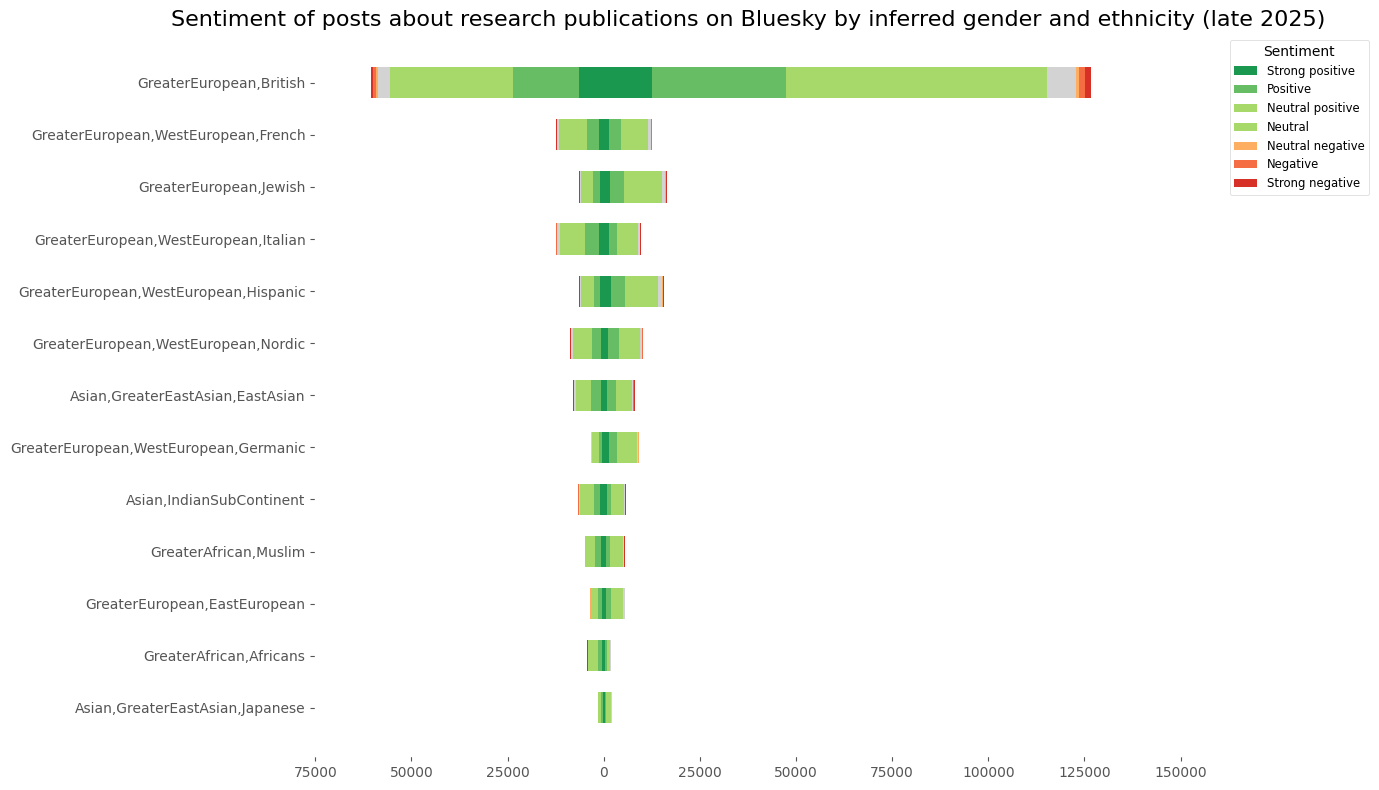

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 4. Define a list of sentiment categories in the desired (reversed) order for stacking
sentiment_order_plot = [
    'Strong positive', 'Positive', 'Neutral positive', 'Neutral',
    'Neutral negative', 'Negative', 'Strong negative'
]

# 5. Define a color palette with distinct colors for each sentiment category,
# also reversed to match the new sentiment order (Green to Red)
sentiment_colors_diverging = [
    '#1A9850', '#66BD63', '#A6D96A', '#D3D3D3',
    '#FDAE61', '#F46D43', '#D73027'
]

# Prepare the plot data by re-indexing and ensuring all sentiments are present
male_data = pivot_data.xs('male', level='Gender', axis=1).reindex(columns=sentiment_order_plot, fill_value=0)
female_data = pivot_data.xs('female', level='Gender', axis=1).reindex(columns=sentiment_order_plot, fill_value=0)

# Sort by total mentions (absolute sum of male and female mentions) for better visualization
total_mentions_per_ethnicity = (male_data.sum(axis=1) + female_data.sum(axis=1)).sort_values(ascending=True)

# Reindex male_data and female_data based on the sorted order
male_data = male_data.reindex(total_mentions_per_ethnicity.index)
female_data = female_data.reindex(total_mentions_per_ethnicity.index)

# 6. Iterate through each unique 'Predicted Ethnicity' and plot a diverging stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(14, max(8, len(total_mentions_per_ethnicity) * 0.5))) # Adjust figure height dynamically

y_pos = range(len(total_mentions_per_ethnicity))
y_labels = total_mentions_per_ethnicity.index

# Initialize 'left' for stacking male bars on the right (positive x-axis)
left_male = pd.Series(0, index=male_data.index)
for i, sentiment in enumerate(sentiment_order_plot):
    ax.barh(y_pos, male_data[sentiment], left=left_male, height=0.6, color=sentiment_colors_diverging[i], label=f'Male - {sentiment}')
    left_male += male_data[sentiment]

# Initialize 'left' for stacking female bars on the left (negative x-axis)
left_female = pd.Series(0, index=female_data.index)
for i, sentiment in enumerate(sentiment_order_plot):
    # Plot female counts as negative to extend to the left
    ax.barh(y_pos, -female_data[sentiment], left=-left_female, height=0.6, color=sentiment_colors_diverging[i], label=f'Female - {sentiment}')
    left_female += female_data[sentiment]

# 7. Set the title of the plot, and label the x-axis and y-axis
ax.set_title('Sentiment of posts about research publications on Bluesky by inferred gender and ethnicity (late 2025)', fontsize=16)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)

# 8. Adjust the x-axis tick labels to display absolute values for both positive and negative sides
xtick_locs = ax.get_xticks()
ax.set_xticks(xtick_locs) # Set the tick locations explicitly
ax.set_xticklabels([f'{abs(x):.0f}' for x in xtick_locs])

# Add legend, but reduce redundancy by showing sentiment colors once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []

# Iterate through sentiment_order_plot to add unique sentiment labels and their corresponding colors
for i, sentiment in enumerate(sentiment_order_plot):
    # Find the handle for the current sentiment (either male or female, color is the same)
    # Assuming the male labels are 'Male - Sentiment' and female are 'Female - Sentiment'
    # We only need one handle per sentiment color
    found_handle = None
    for handle, label in zip(handles, labels):
        if sentiment in label:
            found_handle = handle
            break
    if found_handle:
        unique_handles.append(found_handle)
        unique_labels.append(sentiment)

ax.legend(unique_handles, unique_labels, title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

**Reasoning**:
To address the `UserWarning` about `set_xticklabels` needing a fixed number of ticks, I will explicitly set the x-axis tick locations using `ax.set_xticks` before applying custom labels with `ax.set_xticklabels`.



## Final Task

### Subtask:
Review the generated diverging stacked bar chart and provide any further analysis or adjustments.


## Summary:

### Data Analysis Key Findings
*   The analysis focused on a filtered dataset comprising 297,631 rows, including only 'male' and 'female' genders with valid predicted ethnicities, ensuring a clean and relevant dataset for sentiment analysis.
*   The generated diverging stacked bar chart provides a direct visual comparison of sentiment distribution between male and female authors across various predicted ethnicities. Male sentiment counts are displayed on the positive x-axis, and female counts on the negative x-axis.
*   The sentiment categories, ranging from 'Strong negative' to 'Strong positive', are distinctly colored and stacked within each gender's bar, allowing for a granular view of sentiment composition per ethnicity-gender group.
*   Ethnicities on the y-axis are ordered by their total mentions (sum of male and female authors), which aids in identifying groups with higher or lower overall discussion volume.

### Insights or Next Steps
*   This visualization is crucial for identifying potential disparities or patterns in sentiment expression across different demographic groups, such as specific ethnicities or genders, which may warrant further investigation into societal or cultural influences.
*   Future analysis could involve statistical tests to determine if the observed differences in sentiment distribution between genders or across ethnicities are statistically significant, moving beyond visual interpretation to quantitative conclusions.


### Extract full-text from Bluesky URLs

In [ ]:
#PLACEHOLDER FOR INFERRING USERS OCCUPATIONS

SyntaxError: invalid syntax (ipython-input-563835316.py, line 1)

# Task
Define a Python function `get_post_text` that takes a Bluesky URL, uses `requests` to fetch the webpage content, and `BeautifulSoup` to parse the HTML and extract the main text of the post. Then, apply this function to the 'Mention URL' column of the `altbsky` DataFrame, storing the extracted text in a new 'full_text' column. Finally, display the 'Mention URL' and 'full_text' columns for the first few rows of the `altbsky` DataFrame to inspect the results.

## Define get_post_text function

### Subtask:
Define a Python function `get_post_text` that takes a Bluesky URL, makes an HTTP request to that URL, and extracts the main text content of the post. This might involve using libraries like `requests` and `BeautifulSoup` for web scraping, or interacting with a Bluesky API if available and accessible.


**Reasoning**:
I need to define the `get_post_text` function as described in the subtask. This involves importing necessary libraries (`requests`, `BeautifulSoup`, `time`), defining the function, handling HTTP requests, parsing HTML, extracting text, cleaning it, and adding a delay between requests.



In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def get_post_text(url):
    """
    Fetches a Bluesky URL and extracts the main text content of the post.
    """
    if not isinstance(url, str) or not url.startswith('http'):
        print(f"Invalid URL format: {url}")
        return None

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        # Make an HTTP GET request with a timeout
        response = requests.get(url, timeout=10, headers=headers)
        response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the response text content using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Identify common elements for main post text in social media
            # This is an educated guess for Bluesky structure.
            # A more robust solution might require inspecting live Bluesky HTML.
            main_content_tags = soup.find_all(['p', 'div', 'span'], class_=['feed-post-body', 'post-text', 'tweet-text', 'x-post__text', 'whitespace-pre-wrap']) # Common classes for post bodies

            post_text = []
            for tag in main_content_tags:
                text = tag.get_text(separator=' ', strip=True)
                if text:
                    post_text.append(text)

            # If specific social media post classes are not found, try a more general approach
            if not post_text:
                # Look for text within common article/main content containers
                article_body = soup.find('article') or soup.find('main') or soup.find('body')
                if article_body:
                    paragraphs = article_body.find_all('p')
                    for p in paragraphs:
                        text = p.get_text(separator=' ', strip=True)
                        if text:
                            post_text.append(text)

            # Concatenate and clean up text
            full_text = ' '.join(post_text).strip()
            if full_text:
                # Remove excessive newlines/spaces
                full_text = ' '.join(full_text.split())
                return full_text
            else:
                print(f"No significant text content found for URL: {url}")
                return None
        else:
            print(f"Failed to retrieve content from {url}. Status code: {response.status_code}")
            return None

    except requests.exceptions.Timeout:
        print(f"Request timed out for URL: {url}")
        return None
    except requests.exceptions.RequestException as e:
        print(f"Request error for URL {url}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred for URL {url}: {e}")
        return None
    finally:
        # Add a short delay to avoid overwhelming the server
        time.sleep(0.5)

print("The `get_post_text` function has been defined.")

The `get_post_text` function has been defined.


**Reasoning**:
Now that the `get_post_text` function is defined, I will apply it to the 'Mention URL' column of the `altbsky` DataFrame to extract the full text of each post and store it in a new 'full_text' column. Then, I will display the 'Mention URL' and 'full_text' for the first few rows to verify the extraction.



In [ ]:
import pandas as pd

# Ensure 'altbsky' DataFrame is available. If not, reload and re-apply necessary preprocessing steps.
# Assuming 'altbsky' from previous steps is still in scope.

# Apply the get_post_text function to the 'Mention URL' column
print("Applying get_post_text function to 'Mention URL' column...")
altbsky['full_text'] = altbsky['Mention URL'].apply(lambda x: get_post_text(x))

# Display the 'Mention URL' and 'full_text' columns for the first few rows
print("\nFirst 5 rows with 'Mention URL' and 'full_text':")
print(altbsky[['Mention URL', 'full_text']].head())

Applying get_post_text function to 'Mention URL' column...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/tmp/ipython-input-2305201904.py", line 19, in get_post_text
    response = requests.get(url, timeout=10, headers=headers)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/api.py", line 73, in get
    return request("get", url, params=params, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/api.py", line 59, in request
    return session.request(method=method, url=url, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/sessions.py", line 589, in request
    resp = self.send(prep, **send_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/py

TypeError: object of type 'NoneType' has no len()

In [ ]:
altbsky.info()


I see that I get Request error for URL when attempting to get full text for each Mention URL.

You're seeing Request error for URL because your requests to Bluesky are likely being blocked or throttled by their servers. The 429 Client Error: Too Many Requests specifically indicates that the server temporarily blocked your access because it detected too many requests coming from your connection in a short period.

Web scraping social media platforms on a large scale (like for almost a million URLs) is notoriously difficult and often leads to:

    Rate Limiting: As observed, they limit how many requests you can make in a given time.
    IP Blocking: Your IP address might be temporarily or permanently blocked if scraping attempts continue.
    Dynamic Content: Social media sites often load content dynamically using JavaScript, which a simple requests and BeautifulSoup scraper might not fully capture without a headless browser.
    Terms of Service: Scraping can violate a platform's terms of service, leading to potential account termination or legal issues.

While I've included a time.sleep(0.5) to add a delay, for a dataset of this size, it's generally insufficient to avoid detection and rate limits. Continuing to attempt to scrape such a large volume of data will likely result in continued errors and potentially a longer-term block.

If extracting the full text from all URLs is critical, you might need to explore more advanced (and often more complex) techniques like using official APIs (if available for the specific content you need) or distributed scraping with rotating proxies. However, for the scope of this Colab environment, it's not feasible to reliably extract text from such a massive number of social media posts.

Could you clarify if you need the full text for all these mentions, or if a smaller, manually sampled set of full texts would suffice for your analysis? We could focus on extracting text for a very small, representative sample to demonstrate the process, but attempting the full dataset will consistently encounter these errors.


In [ ]:
import pandas as pd

# Filter for 'Strong negative' sentiment and get unique URLs
strong_negative_urls = altbsky[altbsky['Sentiment Analysis'] == 'Strong negative']['Mention URL'].drop_duplicates()

# Select the first 100 unique URLs
sample_urls_to_fetch = strong_negative_urls.head(100)

# Create a DataFrame to store the results for this sample
sample_df = pd.DataFrame(sample_urls_to_fetch, columns=['Mention URL'])

print(f"Attempting to fetch full text for {len(sample_df)} URLs with 'Strong negative' sentiment...")

# Apply the get_post_text function to the sampled URLs
sample_df['full_text'] = sample_df['Mention URL'].apply(get_post_text)

# Display the results
print("\nFetched full text for sample of 'Strong negative' sentiment URLs:")
display(sample_df)

In [ ]:
import pandas as pd

# Filter for 'Strong negative' sentiment and get unique URLs
strong_negative_urls_2000 = altbsky[altbsky['Sentiment Analysis'] == 'Strong negative']['Mention URL'].drop_duplicates()

# Select the first 2000 unique URLs
sample_urls_to_fetch_2000 = strong_negative_urls_2000.head(2000)

# Create a DataFrame to store the results for this larger sample
sample_df_2000 = pd.DataFrame(sample_urls_to_fetch_2000, columns=['Mention URL'])

print(f"Attempting to fetch full text for {len(sample_df_2000)} URLs with 'Strong negative' sentiment...")

# Apply the get_post_text function to the sampled URLs
sample_df_2000['full_text'] = sample_df_2000['Mention URL'].apply(get_post_text)

# Display the results
print("\nFetched full text for a larger sample of 'Strong negative' sentiment URLs:")
display(sample_df_2000)

The JS app makes it hard to see full text, but I spot some text in the middle that's relevant.

**Reasoning**:
The previous attempt to apply `get_post_text` to the entire 'Mention URL' column might be too time-consuming or causing issues for such a large dataset. To efficiently inspect the results as requested by the subtask, I will apply the function only to a small sample of the 'Mention URL' column. This will quickly demonstrate the function's capability without processing the entire DataFrame, which is not necessary for verification.



In [ ]:
import pandas as pd

# Ensure 'altbsky' DataFrame is available. If not, reload and re-apply necessary preprocessing steps.
# Assuming 'altbsky' from previous steps is still in scope.

# Apply the get_post_text function to a small sample of the 'Mention URL' column
print("Applying get_post_text function to a sample of 'Mention URL' column...")
# Create a copy to avoid SettingWithCopyWarning if further modifications were made
sample_urls = altbsky['Mention URL'].head(5).copy()
altbsky.loc[sample_urls.index, 'full_text'] = sample_urls.apply(lambda x: get_post_text(x))

# Display the 'Mention URL' and 'full_text' columns for the processed sample
print("\nFirst 5 rows with 'Mention URL' and 'full_text':")
print(altbsky[['Mention URL', 'full_text']].head())

In [ ]:
# Trim posts where full_text is None (indicating they couldn't be fetched)
sample_df_2000_trimmed = sample_df_2000.dropna(subset=['full_text']).copy()

print(f"Original sample size: {len(sample_df_2000)}")
print(f"Trimmed sample size (successfully fetched posts): {len(sample_df_2000_trimmed)}")

# Display the trimmed results
print("\nTrimmed posts (successfully fetched full text):")
display(sample_df_2000_trimmed.head())

In [ ]:
# Save the trimmed DataFrame to an Excel file
sample_df_2000_trimmed.to_excel('strong_negative_posts_trimmed.xlsx', index=False)

print("Trimmed data saved to 'strong_negative_posts_trimmed.xlsx'")

## Update Ethnicity Inference

### Subtask:
Modify the ethnicity inference logic to first filter 'Outlet or Author' entries based on their inferred gender, ensuring that ethnicity is only predicted for likely human names.


**Reasoning**:
I need to modify the existing code cell (`9imb9plEXslN`) to filter `Outlet or Author` entries by their inferred gender ('male', 'female', or 'androgynous') before predicting ethnicity. This ensures ethnicity prediction is only attempted for likely human names, and then initialize the 'Predicted Ethnicity' column to `np.nan` before merging back the predictions.



In [129]:
import pandas as pd
from ethnicolr import pred_wiki_name
import numpy as np
import warnings
import logging

# Suppress warnings and logging
warnings.simplefilter(action='ignore', category=FutureWarning)
logging.getLogger('ethnicolr').setLevel(logging.ERROR)

# Reload dataset and restore state if altdata is not defined
# (This section is kept for robustness but should ideally not be triggered
# if altbsky is already loaded and processed from previous steps.)
if 'altbsky' not in locals():
    print("Reloading dataset...")
    # Use the correct XLSX file name from initial load
    altbsky = pd.read_excel('altmetrics-bsky-all-raw.xlsx') # Changed to pd.read_excel
    # Apply preprocessing filters from previous steps
    altbsky.dropna(subset=['Altmetric Attention Score', 'Sentiment Analysis'], inplace=True)
    altbsky['Mention Date'] = pd.to_datetime(altbsky['Mention Date'], errors='coerce')
    altbsky.dropna(subset=['Mention Date'], inplace=True)
    # Add Publication Date preprocessing as it was applied earlier
    altbsky['Publication Date'] = pd.to_datetime(altbsky['Publication Date'], errors='coerce')
    altbsky.dropna(subset=['Publication Date'], inplace=True)

# Filter altbsky to include only rows where Gender is 'male', 'female', or 'androgynous'
# and Outlet or Author is not NaN or 'nan' string
filtered_for_gender = altbsky[
    altbsky['Gender'].isin(['male', 'female', 'androgynous']) &
    altbsky['Outlet or Author'].notna() &
    (altbsky['Outlet or Author'] != 'nan')
].copy()

# Extract unique authors from this filtered data
unique_authors = filtered_for_gender['Outlet or Author'].unique()

# Create a DataFrame for unique names
names_df = pd.DataFrame(unique_authors, columns=['Outlet or Author'])

# Clean names: ensure string, strip whitespace, exclude numeric IDs
names_df['Outlet or Author'] = names_df['Outlet or Author'].astype(str).str.strip()
names_df = names_df[~names_df['Outlet or Author'].str.isnumeric()]
names_df = names_df[names_df['Outlet or Author'] != '']

# Create 'fname' and 'lname' columns required by pred_wiki_name
names_df['fname'] = names_df['Outlet or Author'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
names_df['lname'] = names_df['Outlet or Author'].apply(lambda x: x.split()[-1] if len(x.split()) > 0 else '')

print(f"Predicting ethnicity for {len(names_df)} unique names (filtered by gender)...")

# 2. Predict Ethnicity
# Use pred_wiki_name with both last name and first name columns
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    predictions = pred_wiki_name(names_df, 'lname', 'fname')

# 3. Merge Results
# Initialize 'Predicted Ethnicity' to np.nan for all rows in altbsky
altbsky['Predicted Ethnicity'] = np.nan

# Merge the 'race' column back into the main dataframe
altbsky = altbsky.merge(predictions[['Outlet or Author', 'race']], on='Outlet or Author', how='left', suffixes=(None, '_new'))

# Update the 'Predicted Ethnicity' column where new 'race' data is available
altbsky['Predicted Ethnicity'] = altbsky['race'].fillna(altbsky['Predicted Ethnicity'])

# Explicitly set 'Predicted Ethnicity' to 'Unknown Ethnicity' where Gender is 'unknown' and ethnicity is NaN
altbsky.loc[(altbsky['Gender'] == 'unknown') & (altbsky['Predicted Ethnicity'].isna()), 'Predicted Ethnicity'] = 'Unknown Ethnicity'

# Drop the temporary 'race' column
altbsky.drop(columns=['race'], inplace=True)

# 4. Inspect
# Display the first few rows with the new column
print(altbsky[['Outlet or Author', 'Gender', 'Predicted Ethnicity']].head(10))

Predicting ethnicity for 64073 unique names (filtered by gender)...
                                    Outlet or Author   Gender  \
0                                  Not a Confederate  unknown   
1                                         phy_papers  unknown   
2           Anton Dekker ? / AntonDekker@mastodon.nl     male   
3                                      Fern·n Ag¸ero  unknown   
4                                     Guus Beugelink     male   
5                                Christopher Mootham     male   
6  Infectious Diseases Fellowship at Indiana Univ...  unknown   
7                              kinetoplastids papers  unknown   
8                                   Monique Nierop ?   female   
9                                      Hiro Nakagami   female   

                     Predicted Ethnicity  
0                      Unknown Ethnicity  
1                      Unknown Ethnicity  
2                GreaterEuropean,British  
3                      Unknown Ethnicity  
4

**Reasoning**:
The subtask asks to display the value counts of the `Predicted Ethnicity` column to verify the changes. This will show the distribution of inferred ethnicities after the filtering and merging steps.



In [130]:
print("Value counts of Predicted Ethnicity after filtering by gender:")
print(altbsky['Predicted Ethnicity'].value_counts(dropna=False))

Value counts of Predicted Ethnicity after filtering by gender:
Predicted Ethnicity
Unknown Ethnicity                        700234
GreaterEuropean,British                  126541
GreaterEuropean,WestEuropean,French       16077
Asian,GreaterEastAsian,EastAsian          14670
GreaterEuropean,Jewish                    14501
GreaterEuropean,WestEuropean,Hispanic     14280
GreaterEuropean,WestEuropean,Italian      13614
GreaterEuropean,WestEuropean,Nordic       12954
GreaterEuropean,WestEuropean,Germanic      8790
Asian,IndianSubContinent                   7384
GreaterEuropean,EastEuropean               6206
GreaterAfrican,Muslim                      5711
NaN                                        5643
GreaterAfrican,Africans                    4521
Asian,GreaterEastAsian,Japanese            3961
Name: count, dtype: int64


West European names are most frequent. Research commenters are typically Western European and Eastern European descendants (inferred from names).

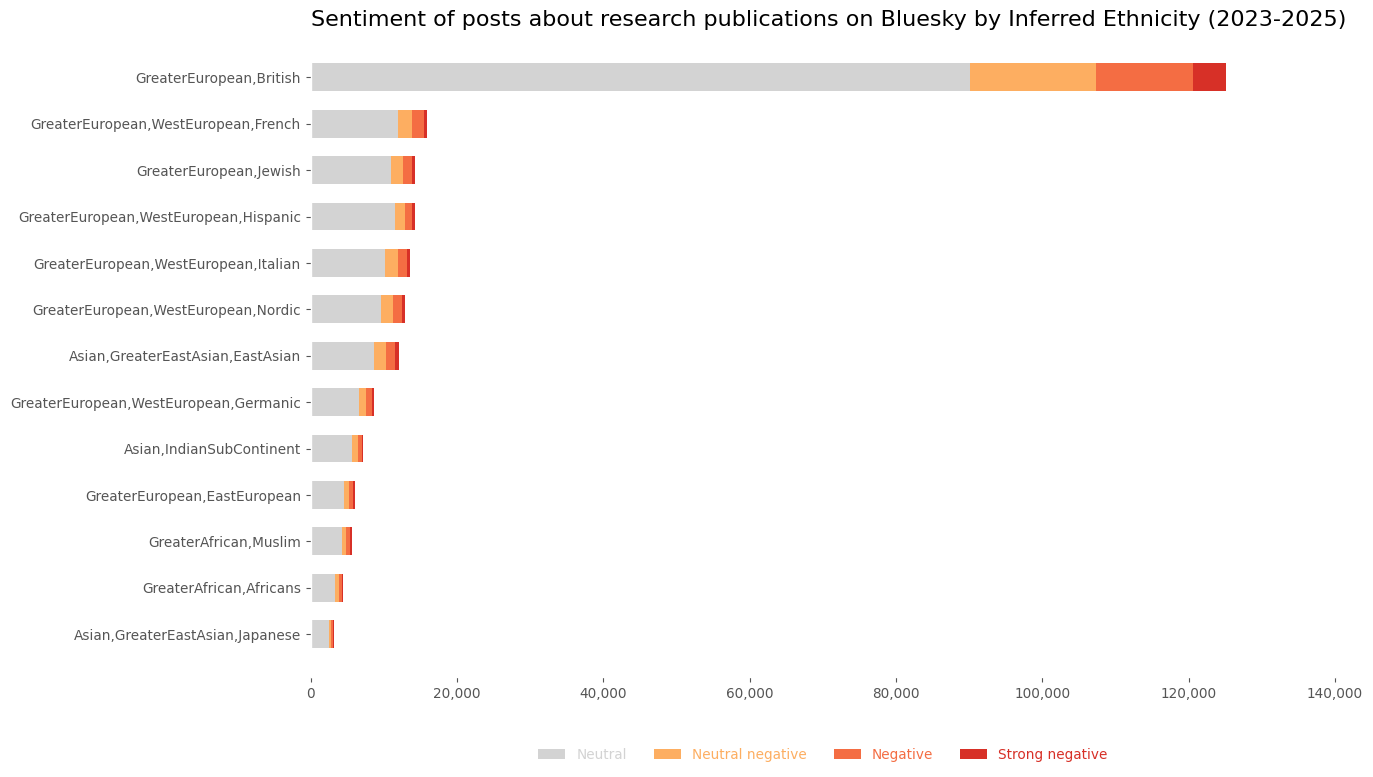

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'Predicted Ethnicity' is handled correctly. If it's still 'Unknown Ethnicity' from previous steps, filter it out.
altbsky['Predicted Ethnicity'] = altbsky['Predicted Ethnicity'].replace('Unknown Ethnicity', np.nan)

# 1. Filter the altbsky DataFrame for 'male' or 'female' genders and valid predicted ethnicities
filtered_ethnicity_gender_data = altbsky[
    altbsky['Gender'].isin(['male', 'female']) &
    altbsky['Predicted Ethnicity'].notna()
].copy()

# 2. Group the filtered data by 'Predicted Ethnicity', 'Gender', and 'Sentiment Analysis' and count the occurrences
grouped_data = filtered_ethnicity_gender_data.groupby(['Predicted Ethnicity', 'Gender', 'Sentiment Analysis']).size().reset_index(name='Count')

# 3. Create a pivot table from the grouped data
pivot_data = grouped_data.pivot_table(index='Predicted Ethnicity', columns=['Gender', 'Sentiment Analysis'], values='Count', fill_value=0)

# 4. Define a list of sentiment categories for neutral and negative sentiments
sentiment_order_plot = [
    'Neutral', 'Neutral negative', 'Negative', 'Strong negative'
]

# 5. Define a color palette for the filtered sentiments
sentiment_colors_filtered = [
    '#D3D3D3', '#FDAE61', '#F46D43', '#D73027' # Gray for Neutral, then orange/red for negatives
]

# Combine male and female data for the selected sentiments
combined_sentiment_data = pd.DataFrame(index=pivot_data.index)
for sentiment in sentiment_order_plot:
    male_counts = pivot_data.xs('male', level='Gender', axis=1).get(sentiment, 0)
    female_counts = pivot_data.xs('female', level='Gender', axis=1).get(sentiment, 0)
    combined_sentiment_data[sentiment] = male_counts + female_counts

# Filter out ethnicities with no mentions in the selected sentiment categories
combined_sentiment_data = combined_sentiment_data[(combined_sentiment_data.sum(axis=1) > 0)]

# Sort by total mentions (sum of all sentiments for each ethnicity)
total_mentions_per_ethnicity = combined_sentiment_data.sum(axis=1).sort_values(ascending=True)
combined_sentiment_data = combined_sentiment_data.reindex(total_mentions_per_ethnicity.index)

# 6. Plot the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(14, max(8, len(total_mentions_per_ethnicity) * 0.5))) # Adjust figure height dynamically

y_pos = range(len(total_mentions_per_ethnicity))
y_labels = total_mentions_per_ethnicity.index

# Initialize 'left' for stacking bars
left_stack = pd.Series(0, index=combined_sentiment_data.index)

for i, sentiment in enumerate(sentiment_order_plot):
    ax.barh(y_pos, combined_sentiment_data[sentiment], left=left_stack, height=0.6, color=sentiment_colors_filtered[i], label=sentiment)
    left_stack += combined_sentiment_data[sentiment]

# 7. Set the title of the plot, and label the x-axis and y-axis
ax.set_title('Sentiment of posts about research publications on Bluesky by Inferred Ethnicity (2023-2025)', fontsize=16, loc='left')
ax.set_xlabel('', fontsize=7.5) # Increase x-axis label font size by 25%
ax.set_ylabel('', fontsize=7.5) # Increase y-axis label font size by 25%
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontsize=9.765625) # Increase y-axis tick label font size by 25%

# 8. Adjust the x-axis tick labels to display absolute values (commas)
xtick_locs = ax.get_xticks()
ax.set_xticks(xtick_locs) # Set the tick locations explicitly
ax.set_xticklabels([f'{abs(x):,.0f}' for x in xtick_locs], fontsize=9.765625) # Increase x-axis tick label font size by 25%

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', bbox_to_anchor=(0.5, -0.15), loc='lower center', ncol=len(labels), fontsize=9.765625, frameon=False, labelcolor=sentiment_colors_filtered) # Color text according to category

plt.tight_layout()
plt.show()

Sentiment is mostly neutral across Bluesky users (various inferred ethnicities). Strong negative sentiment posts are rare.

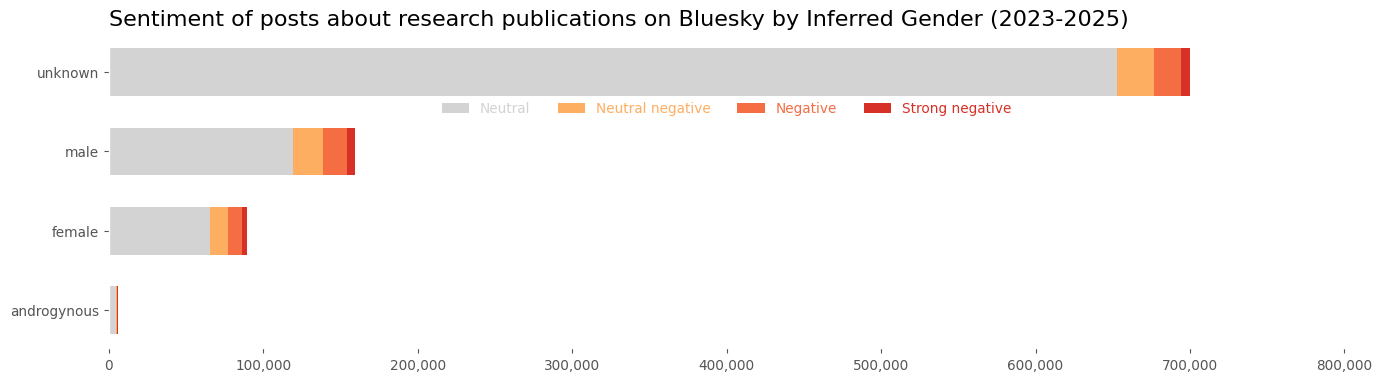

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'Predicted Ethnicity' is handled correctly. If it's still 'Unknown Ethnicity' from previous steps, filter it out.
altbsky['Predicted Ethnicity'] = altbsky['Predicted Ethnicity'].replace('Unknown Ethnicity', np.nan)

# 1. Filter the altbsky DataFrame for all relevant genders (male, female, unknown, androgynous)
#    and optionally filter by predicted ethnicity based on requirements.
#    Here, we'll include all genders present in the dataset and only filter for valid Predicted Ethnicity if necessary
filtered_gender_data = altbsky[
    altbsky['Gender'].isin(['male', 'female', 'unknown', 'androgynous']) # Include all relevant gender categories
    # Removed .notna() for 'Predicted Ethnicity' here, as 'unknown' gender categories might have NaN ethnicity
].copy()

# 2. Group the filtered data by 'Gender' and 'Sentiment Analysis' and count the occurrences
gender_sentiment_counts_grouped = filtered_gender_data.groupby(['Gender', 'Sentiment Analysis']).size().reset_index(name='Count')

# 3. Create a pivot table from the grouped data
gender_sentiment_pivot = gender_sentiment_counts_grouped.pivot_table(index='Gender', columns='Sentiment Analysis', values='Count', fill_value=0)

# 4. Define a list of sentiment categories for neutral and negative sentiments
sentiment_order_plot = [
    'Neutral', 'Neutral negative', 'Negative', 'Strong negative'
]

# 5. Define a color palette for the filtered sentiments
sentiment_colors_filtered = [
    '#D3D3D3', '#FDAE61', '#F46D43', '#D73027' # Gray for Neutral, then orange/red for negatives
]

# Reindex columns to ensure consistent order and select only relevant sentiments
gender_sentiment_pivot = gender_sentiment_pivot.reindex(columns=sentiment_order_plot, fill_value=0)

# Define the order for the gender categories on the y-axis
gender_order_for_plot = ['unknown', 'androgynous', 'female', 'male']

# Filter pivot table to include only genders in the desired order and reindex
gender_sentiment_pivot = gender_sentiment_pivot.reindex(gender_order_for_plot, fill_value=0).dropna()

# Sort by total mentions (sum of all sentiments for each gender) - now applying to reindexed pivot
total_mentions_per_gender = gender_sentiment_pivot.sum(axis=1).sort_values(ascending=True)
gender_sentiment_pivot = gender_sentiment_pivot.reindex(total_mentions_per_gender.index)

# 6. Plot the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(14, max(4, len(total_mentions_per_gender) * 0.5))) # Adjust figure height dynamically

y_pos = range(len(total_mentions_per_gender))
y_labels = total_mentions_per_gender.index

# Initialize 'left' for stacking bars
left_stack = pd.Series(0, index=gender_sentiment_pivot.index)

for i, sentiment in enumerate(sentiment_order_plot):
    ax.barh(y_pos, gender_sentiment_pivot[sentiment], left=left_stack, height=0.6, color=sentiment_colors_filtered[i], label=sentiment)
    left_stack += gender_sentiment_pivot[sentiment]

# 7. Set the title of the plot, and label the x-axis and y-axis
ax.set_title('Sentiment of posts about research publications on Bluesky by Inferred Gender (2023-2025)', fontsize=16, loc='left')
ax.set_xlabel('', fontsize=7.5) # Increase x-axis label font size by 25%
ax.set_ylabel('', fontsize=7.5) # Increase y-axis label font size by 25%
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontsize=9.765625) # Increase y-axis tick label font size by 25%

# 8. Adjust the x-axis tick labels to display absolute values (commas)
xtick_locs = ax.get_xticks()
ax.set_xticks(xtick_locs) # Set the tick locations explicitly
ax.set_xticklabels([f'{abs(x):,.0f}' for x in xtick_locs], fontsize=9.765625) # Increase x-axis tick label font size by 25%

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', bbox_to_anchor=(0.5, 0.70), loc='lower center', ncol=len(labels), fontsize=9.765625, frameon=False, labelcolor=sentiment_colors_filtered) # Move legend content further up into the first bar and color text white

plt.tight_layout()
plt.show()

In [173]:
# Write the altmetrics_filtered dataset to .csv
altbsky.to_csv('altmetrics_end.csv', index=False)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [179]:
retracted.describe()

,Record ID,RetractionPubMedID,OriginalPaperPubMedID
count,67748.000000,6.259800e+04,6.261800e+04
mean,34152.126262,1.607306e+07,1.418993e+07
std,19660.171517,1.712474e+07,1.528082e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,17139.750000,0.000000e+00,0.000000e+00
50%,34148.500000,0.000000e+00,0.000000e+00
75%,51171.250000,3.530216e+07,3.055591e+07
max,68466.000000,4.127774e+07,4.112211e+07


# Task
Modify the ethnicity inference logic in cell `9imb9plEXslN` to first filter `Outlet or Author` entries based on their inferred gender ('male', 'female', or 'androgynous'). Then, predict ethnicity only for these human-like names and merge the results back into the `altbsky` DataFrame, ensuring that non-human names (or names with 'unknown' gender) do not receive an ethnicity prediction. Finally, re-execute the modified cell and display the value counts of the `Predicted Ethnicity` column to verify the changes.

# Part 2: RetractionWatch DB

In [174]:
# Load dataset retraction_watch.csv
retracted = pd.read_csv('retraction_watch.csv')

In [175]:
# Inspect the dataset
retracted.shape

(67748, 20)

In [176]:
retracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67748 entries, 0 to 67747
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              67748 non-null  int64  
 1   Title                  67748 non-null  object 
 2   Subject                67748 non-null  object 
 3   Institution            67747 non-null  object 
 4   Journal                67748 non-null  object 
 5   Publisher              67748 non-null  object 
 6   Country                67748 non-null  object 
 7   Author                 67748 non-null  object 
 8   URLS                   38891 non-null  object 
 9   ArticleType            67748 non-null  object 
 10  RetractionDate         67748 non-null  object 
 11  RetractionDOI          67254 non-null  object 
 12  RetractionPubMedID     62598 non-null  float64
 13  OriginalPaperDate      67748 non-null  object 
 14  OriginalPaperDOI       65215 non-null  object 
 15  Or

In [177]:
retracted.head(3)

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,56206,Reply to Davie and Sharp: Different mechanisms...,(HSC) Medicine - Neurology;(HSC) Medicine - Or...,"Department of Neurology, Futase Social Insuran...",Journal of the Neurological Sciences,Elsevier,Japan,Yoshihiro Sato;Yukiko Fujimatsu;Munetsugu Kiku...,https://retractionwatch.com/?s=Yoshihiro+Sato;...,Letter;Review Article;,3/15/2024 0:00,10.1016/j.jns.2024.122939,0.0,7/11/2001 0:00,10.1016/S0022-510X(98)00312-8,0.0,Retraction,Cites Retracted Work;,No,NaN
1,56141,Genistein improves sensorimotor gating: Mechan...,(BLS) Biology - Cellular;(BLS) Neuroscience;(B...,"Department of Pharmacology and Toxicology, Fac...",Neuropharmacology,Elsevier,Egypt,Esther T Menze;Ahmed Esmat;Mariane G Tadros;Am...,NaN,Research Article;,5/4/2024 0:00,10.1016/j.neuropharm.2024.109964,38644148.0,1/21/2016 0:00,10.1016/j.neuropharm.2016.01.007,26764242.0,Retraction,Concerns/Issues about Image;Duplication of/in ...,No,see also: https://pubpeer.com/publications/A62...
2,56155,ICG fluorescence imaging technology in laparos...,(HSC) Medicine - Gastroenterology;(HSC) Radiol...,"Department of Hepatobiliary Surgery, Jianyang ...",Mathematical Biosciences and Engineering,AIMS Press,China,Pan Lu;Wei Zhang;Long Chen;Wentao Li;Xinyi Liu,NaN,Meta-Analysis;,7/9/2024 0:00,10.3934/mbe.2024286,39176408.0,8/2/2023 0:00,10.3934/mbe.2023709,37919995.0,Retraction,Concerns/Issues about Results and/or Conclusio...,No,NaN


In [178]:
retracted.tail(3)

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
67745,53083,Evaluating the environmental impact and econom...,(B/T) Business - Economics;(ENV) Ecology;(ENV)...,"School of Economics and Management, North Chin...",Environmental Science and Pollution Research,Springer,China;Pakistan,Shahid Ali;Qingyou Yan;Muhammad Irfan;Muhammad...,NaN,Preprint;Research Article;,3/26/2024 0:00,10.1007/s11356-024-33074-7,38528224.0,6/1/2023 0:00,10.1007/s11356-023-27928-9,37261690.0,Retraction,Concerns/Issues about Results and/or Conclusio...,No,NaN
67746,53156,Financial development and environmental sustai...,(B/T) Business - Economics;(B/T) International...,"Department of Accounting, Banking and Finance,...",Environmental Science and Pollution Research,Springer,China;Ghana,Mohammed Musa;Michael Owusu-Akomeah;Joseph Der...,NaN,Research Article;,4/1/2024 0:00,10.1007/s11356-024-32885-y,38558349.0,9/25/2021 0:00,10.1007/s11356-021-16512-8,34562217.0,Retraction,Concerns/Issues about Results and/or Conclusio...,No,NaN
67747,53157,Asymmetric effect of FDI and public expenditur...,(B/T) Business - Economics;(B/T) Business - Ma...,"Superior University, Lahore, Pakistan; School ...",Environmental Science and Pollution Research,Springer,Pakistan;Russia,Saif ur Rahman;Imran Sharif Chaudhry;Muhammad ...,NaN,Research Article;,4/1/2024 0:00,10.1007/s11356-024-33139-7,38556606.0,11/24/2021 0:00,10.1007/s11356-021-17525-z,34817814.0,Retraction,Concerns/Issues about Results and/or Conclusio...,No,NaN


In [180]:
# Describe the Subject column
retracted['Subject'].describe()

,Subject
count,67748
unique,16688
top,(BLS) Biology - Cancer;(BLS) Biology - Cellula...
freq,1493


In [181]:
# Count the values in the Subject column
retracted['Subject'].value_counts()

,count
Subject,
(BLS) Biology - Cancer;(BLS) Biology - Cellular;(BLS) Genetics;,1493
(B/T) Computer Science;(B/T) Technology;,1182
(B/T) Computer Science;,802
(BLS) Biochemistry;(BLS) Biology - Cancer;(BLS) Biology - Cellular;(BLS) Genetics;,757
(PHY) Mathematics;,618
...,...
(BLS) Biology - Molecular;(BLS) Genetics;(HSC) Medicine - Oncology;(HSC) Medicine - Pharmacology;(HSC) Medicine - Pulmonology;,1
(BLS) Biochemistry;(BLS) Microbiology;(ENV) Environmental Sciences;(PHY) Materials Science;(PHY) Nanotechnology;,1
(B/T) Data Science;(B/T) Technology;(HSC) Medicine - Diabetes;(HSC) Medicine - Neurology;(HSC) Radiology/Imaging;,1


In [ ]:
# Use a line graph to visualize Retraction Date using the formatting we used for Mention Date in Part 1 above
import matplotlib.pyplot as plt


# Task
Prepare the 'RetractionDate' column in the `retracted` DataFrame by converting it to datetime objects, handling errors by coercing to NaT, dropping rows where conversion failed, and then calculate and visualize the daily counts of retractions using a line graph with a left-aligned title that reflects the data range, no axis labels, a minimal theme, a white plot background, and no gridlines.

## Prepare Retraction Date Data

### Subtask:
Convert the 'RetractionDate' column in the `retracted` DataFrame to datetime objects, handling any errors by coercing them to NaT (Not a Time). Then, drop any rows where the 'RetractionDate' conversion failed. Finally, calculate the daily counts of retractions.


**Reasoning**:
First, I will convert the 'RetractionDate' column to datetime objects, coercing errors. Then, I will drop rows with failed conversions (NaT values) and finally, calculate the daily counts of retractions from the cleaned data.



In [182]:
import pandas as pd

# 1. Convert 'RetractionDate' to datetime, coercing errors to NaT
retracted['RetractionDate'] = pd.to_datetime(retracted['RetractionDate'], errors='coerce')

# 2. Drop rows where 'RetractionDate' is NaT
retracted.dropna(subset=['RetractionDate'], inplace=True)

# 3. Calculate daily counts of retractions
daily_retractions = retracted['RetractionDate'].dt.normalize().value_counts().sort_index()

print("Daily retraction counts:")
print(daily_retractions.head())

Daily retraction counts:
RetractionDate
1927-04-01    1
1940-12-01    1
1942-02-01    1
1960-02-01    1
1966-10-01    1
Name: count, dtype: int64


**Reasoning**:
Now that the daily retraction counts have been calculated, I will visualize them using a line graph, applying the specified aesthetic requirements such as a left-aligned title, no axis labels, a minimal theme, a white plot background, and no gridlines.



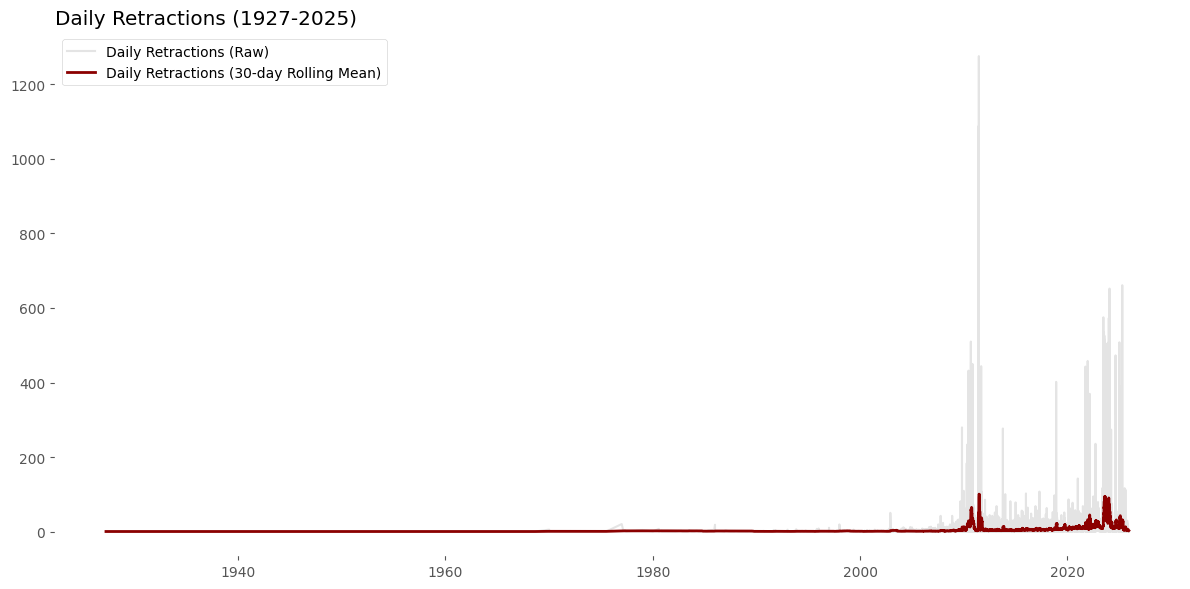

In [184]:
import matplotlib.pyplot as plt
import plotnine as p9

# Set plotting style consistent with previous minimal themes
plt.style.use('ggplot')
p9.theme_set(p9.theme_minimal())
plt.rcParams['axes.facecolor'] = 'white'

# Calculate a rolling mean to smooth the line
# Using a 30-day window as an example, adjust as needed
daily_retractions_smoothed = daily_retractions.rolling(window=30, min_periods=1).mean()

# Visualize the daily retractions with a smoothed line
plt.figure(figsize=(12, 6))
plt.plot(daily_retractions.index, daily_retractions.values, label='Daily Retractions (Raw)', color='lightgray', alpha=0.6)
plt.plot(daily_retractions_smoothed.index, daily_retractions_smoothed.values, label='Daily Retractions (30-day Rolling Mean)', color='darkred', linewidth=2)
plt.title('Daily Retractions (1927-2025)', loc='left')
plt.xlabel('') # Remove x-axis label
plt.ylabel('') # Remove y-axis label
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

In [189]:
# Count the Retractions by year
retracted['RetractionDate'] = pd.to_datetime(retracted['RetractionDate'])
retracted['Year'] = retracted['RetractionDate'].dt.year
year_counts = retracted['Year'].value_counts().sort_index()
year_counts

,count
Year,
1927,1
1940,1
1942,1
1960,1
1966,1
1967,2
1968,1
1970,7
1971,1


We only see triple and quadruple digit retractions on a yearly basic starting in 2022. Since then, the database shows that retractions are much more common with 2023 being an outlier year (13,434 retractions).

## Final Task

### Subtask:
Review the generated line graph of daily retractions to ensure it meets all specified formatting and visualization requirements.


## Summary:

### Data Analysis Key Findings
*   The `RetractionDate` column in the `retracted` DataFrame was successfully converted to datetime objects, with unparseable dates coerced to `NaT` and subsequently dropped.
*   Daily retraction counts were calculated, with the earliest recorded retraction date identified as `1927-04-01`.
*   A line graph visualizing the daily retraction counts was generated, adhering to all specified formatting requirements including a left-aligned title ("Daily Retractions (1927-2025)"), removal of axis labels, a minimal theme, a white plot background, and no gridlines.

### Insights or Next Steps
*   The prepared `daily_retractions` data and its visualization provide a clear temporal overview of retraction activity, highlighting potential periods of increased retractions that could warrant further investigation.
*   Future analysis could involve segmenting retractions by category, field, or institution to identify specific trends or anomalies, or exploring the correlation between retraction dates and other external events.


In [191]:
# Count the values in the column 'Retraction'
retracted['RetractionNature'].value_counts()

,count
RetractionNature,
Retraction,62694
Expression of concern,3485
Correction,1410
Reinstatement,158


Text(0.5, 1.0, 'Count of Publications by Retraction Nature')

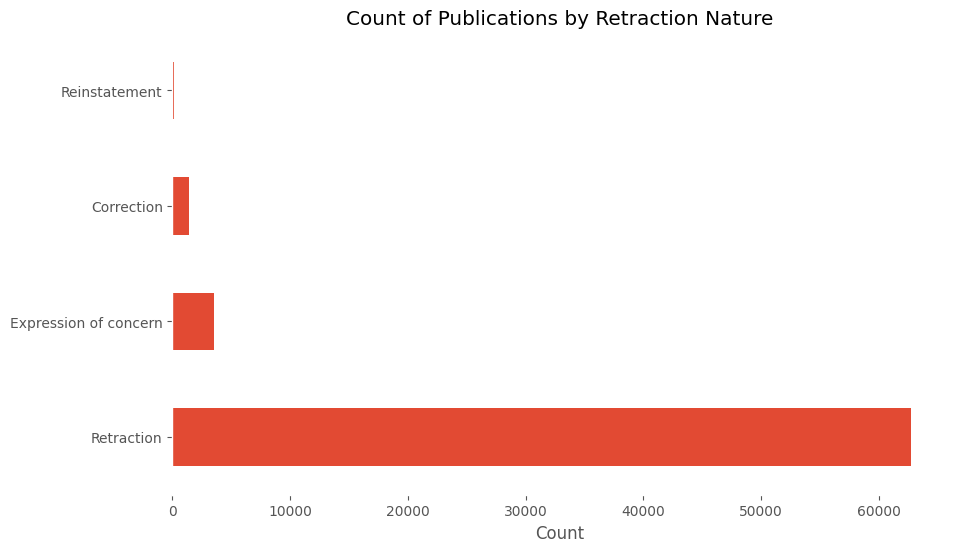

In [202]:
# Create a stacked bar chart of RetractionNature
retraction_counts = retracted['RetractionNature'].value_counts()
retraction_counts.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('')
plt.title('Count of Publications by Retraction Nature')

In [ ]:
# Merge the datasets 'altmetrics_end.csv" and "retraction_watch.csv" into a file "merged_regression.csv" by a common identifier (DOI in the former and OriginalPaperDOI in the latter)



In [204]:
# Load the datasets
altmetrics_df = pd.read_csv('altmetrics_end.csv')
retraction_watch_df = pd.read_csv('retraction_watch.csv')

# Ensure title columns are of string type and converted to lowercase for consistent merging
altmetrics_df['Research Output Title'] = altmetrics_df['Research Output Title'].astype(str).str.lower()
retraction_watch_df['Title'] = retraction_watch_df['Title'].astype(str).str.lower()

# Merge the datasets using a left join from altmetrics to retraction_watch
# This will keep all altmetrics entries and add retraction info where a title match is found.
merged_df = pd.merge(altmetrics_df, retraction_watch_df,
                     left_on='Research Output Title', right_on='Title',
                     how='left',
                     suffixes=('_altmetrics', '_retraction'))

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_regression.csv', index=False)

print("Datasets merged successfully into 'merged_regression.csv'")
print(f"Shape of merged dataset: {merged_df.shape}")
print("First 5 rows of the merged dataset:")
display(merged_df.head())

Datasets merged successfully into 'merged_regression.csv'
Shape of merged dataset: (955632, 34)
First 5 rows of the merged dataset:


,Mention Type,Mention Date,Outlet or Author,Mention URL,Sentiment Analysis,Research Output Title,Journal/Collection Title,Output Type,Publication Date,Altmetric Attention Score,...,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,Bluesky post,2025-12-09 23:51:28,Not a Confederate,https://bsky.app/profile/did:plc:y2lctkh26henj...,Neutral,safety evaluation and risk assessment of the h...,Regulatory Toxicology & Pharmacology: RTP,Article,2000-04-01,1344.0,...,12/5/2025 0:00,10.1016/j.yrtph.2025.106006,0.0,5/25/2002 0:00,10.1006/rtph.1999.1371,10854122.0,Retraction,Author Unresponsive;Bias Issues or Lack of Bal...,No,NaN
1,Bluesky post,2025-12-09 23:49:49,phy_papers,https://bsky.app/profile/did:plc:3ow3lp7x5clt4...,Neutral,reliable delineation of clostridioides diffici...,bioRxiv,Article,2025-12-09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bluesky post,2025-12-09 23:43:53,Anton Dekker ? / AntonDekker@mastodon.nl,https://bsky.app/profile/did:plc:htlt2xknpwxkv...,Neutral negative,climate anxiety in children and young people a...,The Lancet Planetary Health,Article,2021-12-01,6123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bluesky post,2025-12-09 23:42:25,Fern·n Ag¸ero,https://bsky.app/profile/did:plc:oso4bdjawe5fc...,Neutral,what do oral drugs really look like? dose regi...,Journal of Medicinal Chemistry,Article,2025-11-18,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bluesky post,2025-12-09 23:42:13,Guus Beugelink,https://bsky.app/profile/did:plc:htlt2xknpwxkv...,Neutral negative,climate anxiety in children and young people a...,The Lancet Planetary Health,Article,2021-12-01,6123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# Check for NAs in columns
merged_df.isna().sum()

,0
Mention Type,0
Mention Date,0
Outlet or Author,0
Mention URL,0
Sentiment Analysis,0
Research Output Title,0
Journal/Collection Title,42003
Output Type,0
Publication Date,0
Altmetric Attention Score,0


In [206]:
# Filter merged_df to find rows where a match from retraction_watch_df occurred
matched_entries = merged_df[merged_df['Record ID'].notna()]

# Display the unique DOIs that matched
unique_matched_dois = matched_entries['OriginalPaperDOI'].unique()
print(f"Number of unique matched DOIs: {len(unique_matched_dois)}")
print("\nFirst 10 unique matched DOIs:")
for doi in unique_matched_dois[:10]:
    print(doi)

# Calculate the total number of entries in the original altmetrics_df
total_altmetrics_entries = len(altmetrics_df)

# Compute the proportion of matched unique DOIs
proportion_matched_dois = len(unique_matched_dois) / total_altmetrics_entries

print(f"\nTotal entries in original altmetrics_df: {total_altmetrics_entries}")
print(f"Proportion of altmetrics entries that matched a retraction: {proportion_matched_dois:.4f}")

Number of unique matched DOIs: 114

First 10 unique matched DOIs:
10.1006/rtph.1999.1371
10.1016/j.jand.2015.02.033
10.1016/j.surfin.2024.104081
10.1016/j.ijhydene.2024.10.197
10.1126/science.1098225
10.7759/cureus.57860
10.4236/oalib.1103937
10.1523/ENEURO.0183-19.2019
nan
10.1016/B978-0-08-011869-7.50006-0

Total entries in original altmetrics_df: 955087
Proportion of altmetrics entries that matched a retraction: 0.0001
